# Credit Card Default Prediction
`Raden Dissa Shafira`

# I. Introducton

Pada proyek ini akan dilakukan pembuatan model prediksi untuk mengklasifikasikan golongan *default payment* atau gagal bayar kartu kredit. Pembayaran *default* kartu kredit mengacu pada situasi di mana pemegang kartu kredit gagal melakukan pembayaran minimum yang diperlukan untuk kartu kredit pada tanggal jatuh tempo--biasanya dari tiga sampai enam bulan tunggakan. *Default* terjadi ketika penerbit kartu memutuskan untuk menutup rekening peminjam karena pembayaran yang terlewatkan (sumber: [gocardless](https://gocardless.com/guides/posts/payment-defaults/#:~:text=What%20is%20a%20payment%20default,account%20because%20of%20missed%20payments.)).

Dalam proyek ini, klasifikasi terbagi atas golongan 'no' (index = 0) yang berarti tidak terjadi *default payment*, dan 'yes' (index = 1) yang berarti penerbit kartu menerapkan *default payment* untuk pemegang kartu pada bulan setelahnya. 


**Problem statement:** 

Diperlukan model klasifikasi dengan akurasi tinggi untuk dapat memprediksi *default payment* yang disebabkan oleh tunggakan kartu kredit. Diperlukan adanya percobaan beberapa jenis model untuk dapat membandingkan serta mendapatkan model paling akurat. Akurasi tinggi diperlukan untuk dapat memprediksi pembayaran bulanan kartu kredit dengan tepat; tentunya untuk mengurangi resiko kerugian untuk pihak penerbit kartu.

**Dataset:**

[Dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&project=molten-team-383513&ws=!1m9!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default!1m3!8m2!1s681236883696!2s2e90e5b0d93b4ae8bb309369d2b00670!1m5!1m4!1m3!1smolten-team-383513!2sbquxjob_76149282_188144f8290!3sUS) yang akan dipakai adalah dataset “Credit Card Default” yang berasal klien kredit di Taiwan dari bulan April hingga September pada tahun 2005. Dataset ini memiliki 24 kolom serta 2965 baris data. Berikut adalah deskripsi beserta informasi tipe data pada masing-masing kolom yang tersedia:

| Field name         |  Data type   | Type      | Description                                                                                                                          |
|--------------------|-------------|----------|--------------------------------------------------------------------------------------------------------------------------------------|
| limit_balance      | FLOAT  |    Numerical      | Amount of given credit in NT dollars (includes individual and family/supplementary credit)                                           |
| sex                | INT |    Categorical      | Gender (1=male, 2=female)                                                                                                             |
| education_level    | INT |     Categorical     | Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)                                      |
| marital_status     | INT |   Categorical       | Marital status (1=married, 2=single, 3=others)                                                                                         |
| age                | FLOAT  |   Numerical       | Age in years                                                                                                                          |
| pay_0              | FLOAT  |   Categorical       | Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, 3=payment delay for three months, 4=payment delay for four months, 5=payment delay for five months, 6=payment delay for six months, 7=payment delay for seven months 8=payment delay for eight months, 9=payment delay for nine months and above) |
| pay_2                           | FLOAT   |    Categorical     | Repayment status in August, 2005 (scale same as above)                                                                                      |
| pay_3                           | FLOAT   |    Categorical     | Repayment status in July, 2005 (scale same as above)                                                                                        |
| pay_4                           | FLOAT   |     Categorical    | Repayment status in June, 2005 (scale same as above)                                                                                        |
| pay_5                           | FLOAT  |     Categorical    | Repayment status in May, 2005 (scale same as above)                                                                                         |
| pay_6                           | FLOAT  |  Categorical       | Repayment status in April, 2005 (scale same as above)                                                                                       |
| bill_amt_1                      | FLOAT   |   Numerical      | Amount of bill statement in September, 2005 (NT dollar)                                                                 |
| bill_amt_2                      | FLOAT   |    Numerical     | Amount of bill statement in August, 2005 (NT dollar)                                                                   |
| bill_amt_3                      | FLOAT   |    Numerical     | Amount of bill statement in July, 2005 (NT dollar)                                                                     |
| bill_amt_4                      | FLOAT   |   Numerical      | Amount of bill statement in June, 2005 (NT dollar)                                                                     |
| bill_amt_5                      | FLOAT   |    Numerical     | Amount of bill statement in May, 2005 (NT dollar)                                                                      |
| bill_amt_6                      | FLOAT   |    Numerical     | Amount of bill statement in April, 2005 (NT dollar)                                                                    |
| pay_amt_1                       | FLOAT   |     Numerical    | Amount of previous payment in September, 2005 (NT dollar)                                                              |
| pay_amt_2                       | FLOAT   |   Numerical      | Amount of previous payment in August, 2005 (NT dollar)                                                                 |
| pay_amt_3                       | FLOAT   |   Numerical      | Amount of previous payment in July, 2005 (NT dollar)                                                                   |
| pay_amt_4                       | FLOAT   |     Numerical    | Amount of previous payment in June, 2005 (NT dollar)                                                                   |
| pay_amt_5                       | FLOAT   |     Numerical    | Amount of previous payment in May, 2005 (NT dollar)                                                                    |
| pay_amt_6                       | FLOAT   |    Numerical     | Amount of previous payment in April, 2005 (NT dollar)                                                                  |
| default_payment_next_month      | INT  |     Categorical    | Default payment (1=yes, 0=no)                                                                                          |


**Question and Assumptions:**

Dalam proyek ini juga akan ada beberapa pertanyaan dan asumsi yang menjadi ketertarikan dari proyek ini, yakni:
1. Apakah ada korelasi dari kolom-kolom atribut dengan target? Jika ada, apa saja serta apa asumsi dibalik korelasinya?
2. Apa argumen dalam menentukan menentukan model yang akan dipakai?
3. Dari model yang akan dibuat, bagaimana evaluasinya? Apa model serta parameter terbaik untuk mengolah data tersebut?
4. Apa kelebihan dan kekurangan dari model dalam sisi lembaga finansial?
5. Apa yang dapat dikembangkan dari proyek ini (baik dalam modelling maupun proses lainnya)?

# II. Import Libraries
Berisi library yang akan digunakan dalam project.

In [1]:
# library math dan visualisasi
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from collections import Counter
import numpy as np
np.random.seed(66)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature engineering
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer # encoding dan scaling
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer  # untuk capping outlier
from scipy.stats import chi2_contingency        # untuk melihat korelasi

# model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

# evaluasi
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, f1_score
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# save model& inferencing
import pickle
import json
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")

# III. Data Loading
Bagian ini berisikan data loading serta pengecekan mengenai banyak data, isi data, ukuran data, dan sebagainya untuk mengetahui bagian apa yang berpotensi untuk diamati lebih lanjut.

Berikut adalah kode SQL yang digunakan dalam filtering dari [dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&project=molten-team-383513&ws=!1m9!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default!1m3!8m2!1s681236883696!2s2e90e5b0d93b4ae8bb309369d2b00670!1m5!1m4!1m3!1smolten-team-383513!2sbquxjob_76149282_188144f8290!3sUS) yang digunakan.

```sql
SELECT limit_balance,
CAST(sex AS INTEGER) AS sex,
CAST(education_level AS INTEGER) AS education_level,
CAST(marital_status AS INTEGER) AS marital_status,
age,
pay_0,bill_amt_1,pay_amt_1,
pay_2,bill_amt_2,pay_amt_2,
pay_3,bill_amt_3,pay_amt_3,
pay_4,bill_amt_4,pay_amt_4,
CAST(pay_5 AS FLOAT64) AS pay_5,bill_amt_5,pay_amt_5,
CAST(pay_6 AS FLOAT64) AS pay_6,bill_amt_6,pay_amt_6,
CAST(default_payment_next_month AS INTEGER) AS default_payment_next_month 
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 38000 -- Batch 19 * 2000 (tahun kelahiran)
```

In [2]:
# loading data
df = pd.read_csv('h8dsft_P1M1_R_Dissa.csv')

In [3]:
# menampilkan 10 data pertama
# melihat seluruh isi kolom 
pd.set_option('display.max_columns', None)
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_1,pay_amt_1,pay_2,bill_amt_2,pay_amt_2,pay_3,bill_amt_3,pay_amt_3,pay_4,bill_amt_4,pay_amt_4,pay_5,bill_amt_5,pay_amt_5,pay_6,bill_amt_6,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,61454.0,2545.0,0.0,61808.0,2208.0,0.0,62290.0,1336.0,0.0,29296.0,2232.0,0.0,26210.0,542.0,0.0,17643.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,49221.0,1689.0,0.0,49599.0,2164.0,0.0,50942.0,2500.0,0.0,50146.0,3480.0,0.0,50235.0,2500.0,0.0,48984.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,19568.0,4641.0,0.0,19420.0,1019.0,0.0,15535.0,900.0,0.0,1434.0,0.0,0.0,500.0,1500.0,0.0,0.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,18457.0,5000.0,0.0,22815.0,5000.0,0.0,27086.0,1137.0,0.0,27821.0,5000.0,0.0,30767.0,1085.0,0.0,29890.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,159919.0,4019.0,0.0,68686.0,146896.0,0.0,161192.0,157436.0,-1.0,150464.0,4600.0,0.0,143375.0,4709.0,0.0,146411.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,54053.0,15235.0,0.0,65235.0,1491.0,0.0,64747.0,1303.0,0.0,65150.0,0.0,0.0,-450.0,2000.0,-1.0,700.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,58180.0,2886.0,0.0,59134.0,2908.0,0.0,61156.0,2129.0,0.0,62377.0,2354.0,0.0,63832.0,2366.0,0.0,65099.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,192461.0,7822.0,0.0,195970.0,4417.0,0.0,122214.0,4446.0,0.0,124647.0,4597.0,0.0,126921.0,4677.0,0.0,129167.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,133598.0,54209.0,0.0,167378.0,4607.0,0.0,171106.0,4603.0,0.0,174500.0,5224.0,0.0,137406.0,207440.0,0.0,204975.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,160879.0,7000.0,0.0,161797.0,6607.0,0.0,165107.0,3773.0,0.0,105508.0,4290.0,0.0,108101.0,4164.0,0.0,110094.0,2000.0,0


In [4]:
# menampilkan 10 data terakhir
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_1,pay_amt_1,pay_2,bill_amt_2,pay_amt_2,pay_3,bill_amt_3,pay_amt_3,pay_4,bill_amt_4,pay_amt_4,pay_5,bill_amt_5,pay_amt_5,pay_6,bill_amt_6,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,1968.0,463.0,-1.0,459.0,2500.0,-1.0,2500.0,0.0,-1.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,12878.0,2000.0,0.0,7702.0,2377.0,-1.0,2377.0,40000.0,-1.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-100.0,200.0,-1.0,100.0,0.0,-1.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,5280.0,5000.0,-1.0,5000.0,5000.0,-1.0,5000.0,0.0,-1.0,0.0,5000.0,-2.0,0.0,5000.0,-1.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,96.0,1560.0,-1.0,780.0,0.0,-1.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,4280.0,2800.0,-1.0,2800.0,0.0,-1.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,752.0,300.0,-1.0,300.0,5880.0,-1.0,5880.0,0.0,-1.0,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,390.0,390.0,-2.0,390.0,780.0,-2.0,390.0,390.0,-2.0,390.0,390.0,-2.0,390.0,390.0,-2.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,1473.0,390.0,-2.0,390.0,390.0,-2.0,390.0,390.0,-2.0,390.0,390.0,-2.0,390.0,0.0,-2.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-70.0,10000.0,-2.0,9540.0,800.0,-2.0,390.0,3184.0,-2.0,3184.0,390.0,-2.0,390.0,390.0,-2.0,390.0,6617.0,0


In [5]:
# melihat jumlah baris dan kolom data
df.shape

(2965, 24)

In [6]:
# melihat informasi general data; tipe data serta jumlah data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   bill_amt_1                  2965 non-null   float64
 7   pay_amt_1                   2965 non-null   float64
 8   pay_2                       2965 non-null   float64
 9   bill_amt_2                  2965 non-null   float64
 10  pay_amt_2                   2965 non-null   float64
 11  pay_3                       2965 non-null   float64
 12  bill_amt_3                  2965 non-null   float64
 13  pay_amt_3                   2965 

# IV. EDA

Berisi eksplorasi data pada dataset yang akan dilakukan pembuatan query, grouping, serta visualisasi data. Bagian ini akan menekankan deskripsi serta keterhubungan data secara prinsip.

- Melihat deskripsi data (tendensi sentral, maksimal, minimum, dan sebagainya)
- Melihat persebaran data pada dataset berbasis numerikal, dan melihat rasio data kategorikal.
- Melihat korelasi fitur dengan data target ('default_payment_next_month')
- Menentukan model yang akan dipakai melihat dari pola korelasi fitur dan target.

Berdasarkan deskripsi data yang telah dicantumkan pada bagian Introduction, kita sudah dapat mengasumsikan kolom mana saja yang merupakan kolom numerikal dan kategorikal. Oleh karena itu akan dilakukan pemisahan kolom sesuai masing-masing tipe data.

In [7]:
# mengelompokkan kolom kategorikal
cat_cols= ['sex', 'education_level', 'marital_status','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month', ]

# mengelompokkan kolom numerikal(selain cat)
num_cols = df.drop(cat_cols, axis=1).columns.tolist()
num_cols

['limit_balance',
 'age',
 'bill_amt_1',
 'pay_amt_1',
 'bill_amt_2',
 'pay_amt_2',
 'bill_amt_3',
 'pay_amt_3',
 'bill_amt_4',
 'pay_amt_4',
 'bill_amt_5',
 'pay_amt_5',
 'bill_amt_6',
 'pay_amt_6']

**Duplication and missing data**

In [8]:
# melihat apakah ada data terduplikasi
# bila tidak ada, tidak dilakukan proses apapun

df.duplicated().sum()

1

In [9]:
# menghapus data yang terindikasi terduplikasi
df.drop_duplicates(inplace=True)
# memastikan sudah tidak ada data terduplikasi
df.duplicated().sum()

0

In [10]:
# melihat jika ada data yang hilang
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
bill_amt_1                    0
pay_amt_1                     0
pay_2                         0
bill_amt_2                    0
pay_amt_2                     0
pay_3                         0
bill_amt_3                    0
pay_amt_3                     0
pay_4                         0
bill_amt_4                    0
pay_amt_4                     0
pay_5                         0
bill_amt_5                    0
pay_amt_5                     0
pay_6                         0
bill_amt_6                    0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Sudah tidak ada data terduplikasi maupun data yang kosong.

In [11]:
# melihat deskripsi data
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_1,pay_amt_1,pay_2,bill_amt_2,pay_amt_2,pay_3,bill_amt_3,pay_amt_3,pay_4,bill_amt_4,pay_amt_4,pay_5,bill_amt_5,pay_amt_5,pay_6,bill_amt_6,pay_amt_6,default_payment_next_month
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,163356.950067,1.607625,1.849865,1.560054,35.193657,0.004723,52135.889001,6351.044872,-0.121795,50666.241228,6.274611e+03,-0.141026,48256.032726,5152.234818,-0.184548,44104.558367,4562.914980,-0.224696,40969.898448,4914.944332,-0.254049,39786.491228,5384.517544,0.214238
std,125049.701016,0.488362,0.778159,0.522304,9.110949,1.114434,72334.536115,20888.933729,1.180479,70790.828470,2.888432e+04,1.183337,68151.445516,14289.177313,1.178049,61912.600106,13283.476236,1.158739,58276.878626,16736.920951,1.167061,57308.498646,17278.585006,0.410362
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-11545.000000,0.000000,-2.000000,-67526.000000,0.000000e+00,-2.000000,-25443.000000,0.000000,-2.000000,-46627.000000,0.000000,-2.000000,-46627.000000,0.000000,-2.000000,-73895.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,3979.750000,1013.000000,-1.000000,3403.500000,9.975000e+02,-1.000000,3311.750000,479.250000,-1.000000,2585.000000,313.750000,-1.000000,1974.500000,325.250000,-1.000000,1433.000000,175.250000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,24325.000000,2238.000000,0.000000,23169.000000,2.182500e+03,0.000000,21549.500000,1997.000000,0.000000,19895.000000,1600.000000,0.000000,18819.500000,1646.500000,0.000000,18511.500000,1626.500000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,69863.000000,5089.500000,0.000000,67836.250000,5.000000e+03,0.000000,63034.500000,4500.000000,0.000000,58638.500000,4000.250000,0.000000,53414.500000,4021.000000,0.000000,52297.000000,4081.750000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,613860.000000,493358.000000,7.000000,512650.000000,1.227082e+06,7.000000,578971.000000,199209.000000,8.000000,488808.000000,202076.000000,7.000000,441981.000000,388071.000000,7.000000,436172.000000,403500.000000,1.000000


Kita telah mengetahui gambaran umum isi data. Untuk selanjutnya, eksplorasi data akan dilakukan secara terpisah (numerikal dan kategorikal) untuk mendapatkan hasil analisis yang lebih mendetail sebelum akhirnya dilakukan lagi eksplorasi data secara keseluruhan. 

## Categorical

Bagian ini akan fokus dalam melihat korelasi fitur kategorikal dengan target. Namun diluar dari itu, akan dilakukan juga beberapa pengelompokkan dan visualisasi untuk melihat keterhubungan dan keunikan data. 

In [12]:
# karena data kztegorial sudah dilakukan encoding dari dataset asli, perlu dilakukan pembuatan tabel describe secara manual
# membuat dataframe kosong
description_df = pd.DataFrame(columns=['Column', 'Unique Values', 'Count Unique', 'Top Value'])

# iterasi masing-masing kolom terhadap rumus count, top, dll
for column in cat_cols:
    unique_values = df[column].unique()
    count = df[column].nunique()
    top_value = df[column].value_counts().idxmax()
    description_df = description_df.append({'Column': column, 'Unique Values': unique_values, 'Count Unique': count, 'Top Value': top_value}, ignore_index=True)

# show
description_df

,Column,Unique Values,Count Unique,Top Value
0,sex,"[1, 2]",2,2
1,education_level,"[6, 4, 1, 2, 3, 5, 0]",7,2
2,marital_status,"[1, 2, 3, 0]",4,2
3,pay_0,"[0.0, 2.0, 1.0, -1.0, -2.0, 3.0, 4.0, 5.0, 6.0...",11,0.0
4,pay_2,"[0.0, -1.0, 2.0, 3.0, -2.0, 4.0, 1.0, 5.0, 6.0...",10,0.0
5,pay_3,"[0.0, 2.0, -2.0, 3.0, -1.0, 4.0, 5.0, 6.0, 7.0]",9,0.0
6,pay_4,"[0.0, -1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",10,0.0
7,pay_5,"[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, -1.0, -2.0]",9,0.0
8,pay_6,"[0.0, -1.0, 2.0, 3.0, -2.0, 4.0, 6.0, 7.0]",8,0.0
9,default_payment_next_month,"[1, 0]",2,0


Karena data sudah ditransformasikan (*encode**) sebelumnya, maka akan sedikit sulit untuk mengartikan tabel di atas. Berikut adalah deskripsi data kategorikal dengan pengertian aslinya;

- 'sex': Memiliki dua value unik dimana value terbanyak adalah '2' = female. Hal ini menjadi gambaran bahwa pada data ini, wanita merupakan gender yang cenderung lebih sering berbelanja menggunakan kredit. 
- 'education_level': Memiliki tujuh value unik dimana value terbanyak adalah '2' = University.
- 'marital_status': Memiliki empat value unik dimana value terbanyak adalah '2' = single. Hal ini menunjukkan pada data ini pengguna kartu kredit terbanyak adalah yang belum menikah.
- Seluruh kolom 'pay': Value terbanyak adalah '0.0'. Karena tidak ada keterangan pada deskripsi dari sumber dataset, maka diperlukan analisis dan pengambilan asumsi lebih lanjut
- 'default_payment_next_month' = '0' = 'no'.

Setelah melihat value unik dari setiap kolom, kami mendapati bahwa sepertinya ada **kekurangan kejelasan** dari deskripsi dataset mengenai **value '0' dan '-2'** pada setiap kolom 'pay_0...6'. 

**) Untuk keterangan mengenai kode serta pengertiannya lebih lanjut dapat dilihat kembali pada tabel yang tersedia di bagian Introduction.*

**Encoded values further description**

Dalam mencari pengertian mengenai value '0' dan '-2' pada setiap kolom 'pay_0...6', perlu dilakukan analisis lebih lanjut terutama dengan melihat gambaran keseluruhan data. 

In [13]:
# melihat satu baris sebagai contoh
df.head(1)

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_1,pay_amt_1,pay_2,bill_amt_2,pay_amt_2,pay_3,bill_amt_3,pay_amt_3,pay_4,bill_amt_4,pay_amt_4,pay_5,bill_amt_5,pay_amt_5,pay_6,bill_amt_6,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,61454.0,2545.0,0.0,61808.0,2208.0,0.0,62290.0,1336.0,0.0,29296.0,2232.0,0.0,26210.0,542.0,0.0,17643.0,348.0,1


In [14]:
# melihat satu baris sebagai contoh
df.tail(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,bill_amt_1,pay_amt_1,pay_2,bill_amt_2,pay_amt_2,pay_3,bill_amt_3,pay_amt_3,pay_4,bill_amt_4,pay_amt_4,pay_5,bill_amt_5,pay_amt_5,pay_6,bill_amt_6,pay_amt_6,default_payment_next_month
2962,450000.0,2,2,1,38.0,-2.0,390.0,390.0,-2.0,390.0,780.0,-2.0,390.0,390.0,-2.0,390.0,390.0,-2.0,390.0,390.0,-2.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,1473.0,390.0,-2.0,390.0,390.0,-2.0,390.0,390.0,-2.0,390.0,390.0,-2.0,390.0,0.0,-2.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-70.0,10000.0,-2.0,9540.0,800.0,-2.0,390.0,3184.0,-2.0,3184.0,390.0,-2.0,390.0,390.0,-2.0,390.0,6617.0,0


Baris pertama menunjukkan value '0.0' pada beberapa kolom 'pay_0...6', sementara  baris ke-2 yang menunjukkan keberadaan value '-2.0' pada beberapa kolom 'pay_0...6'. Kami kemudian berasumsi bahwa:
- '0.0' berarti terjadi pembayaran yang setidaknya memenuhi batas minimal, namun hutang belum sepenuhnya dilunasi. Hal ini dapat memberi keamanan akun yang minimal, namun tetap dapat memancing *default payment* apabila selama beberapa bulan hutang tetap tidak terpenuhi. 
- '-1' berarti pembayaran sudah dilunasi atau ada kelebihan *balance* yang dianggap sudah dapat memenuhi tunggangan bulan tersebut (value yang diinginkan)
- '-2.0' berarti pembayaran dapat dilunasi atau ada kelebihan *balance* yang dianggap sudah dapat memenuhi tunggangan bulan setelahnya. Value ini juga terlihat ketika pengguna sudah jarang melakukan transaksi/ *inactive*. Hal ini tidak selalu berarti baik, karena walaupun pengguna kartu kredit dianggap tidak memiliki hutang, hal ini menggambarkan bahwa pengguna kartu tidak lagi menggunakan jasa peminjaman. Perilaku seperti ini juga **dapat memancing *default payment*** karna pihak penerbit dapat menonaktifkan akun yang dianggap kurang menguntungkan. 

Pendapat ini juga didukung oleh hasil diskusi dari salah satu sumber data pada [link](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/51852) berikut. 

**Visualization**

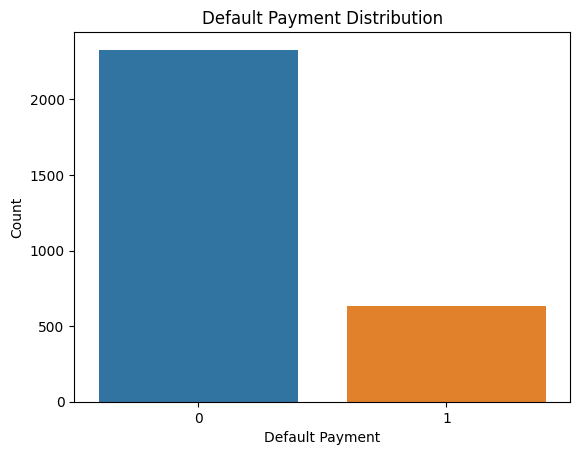

In [15]:
# memvisualisasikan jumlah default_payment_next_month pada masing-masing kategori
sns.countplot(data=df, x='default_payment_next_month')
plt.title('Default Payment Distribution')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.show()

In [16]:
# melihat perbedaan jumlah 
df['default_payment_next_month'].value_counts()

0    2329
1     635
Name: default_payment_next_month, dtype: int64

Diketahui bahwa pemilik kartu kredit yang tidak mendapatkan *default payment* berjumlah 2329 orang sedangkan 635 orang lainnya termasuk dalam golongan *default payment* atau mendapat pemberhentian kartu kredit. Dapat dilihat bahwa pemilik kartu kredit yang mendapatkan *default payment* berjumlah lebih kecil dengan perbandingan kurang lebih satu dari empat orang. 

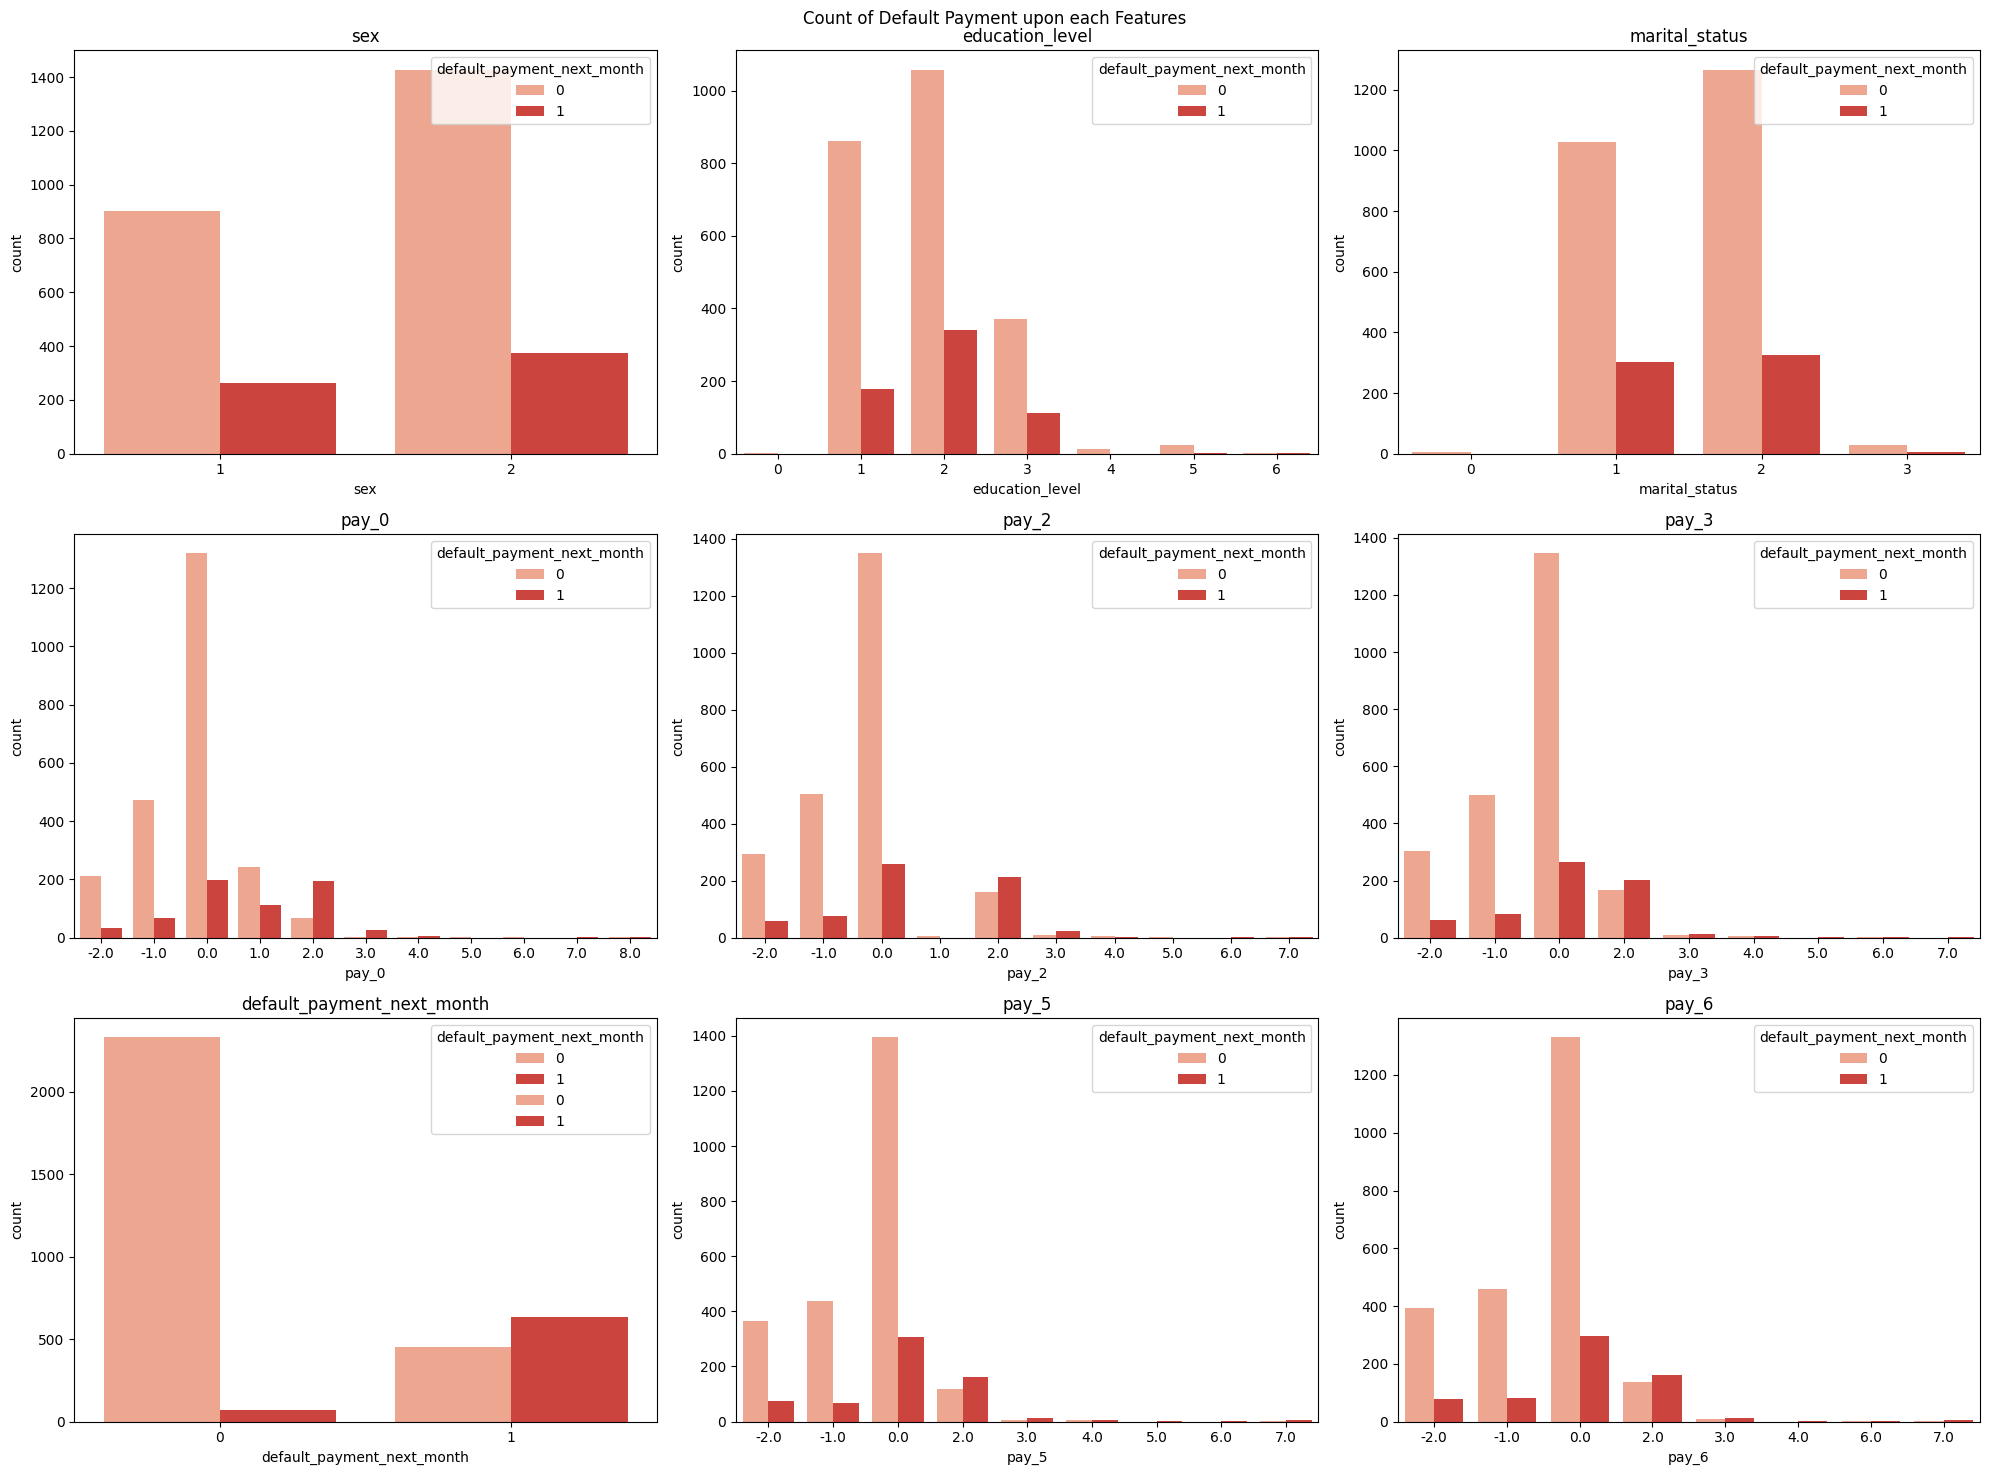

In [17]:
# membuat canvas
df['default_payment_next_month'].value_counts()
f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('Count of Default Payment upon each Features')

# loop untuk tiap kolom pada list
for i, column in enumerate(cat_cols):
    row = i // 3  # Nomor baris subplot
    col = i % 3   # Nomor kolom subplot
    
    # show count plot
    ax = sns.countplot(x=column, hue='default_payment_next_month', data=df[cat_cols], palette='Reds', ax=axes[min(row, 2), min(col, 2)])
    ax.set_title(column)
    ax.legend(title='default_payment_next_month', loc='upper right')

# show all plot
plt.tight_layout()
plt.show()

Dari kumpulan plot di atas, dapat diketahui bahwa relasi frekuensi 'default_payment_next_month' dengan tiap kolom adalah sebagai berikut:
- sex: Terlihat bahwa perempuan juga memiliki frekuensi *default payment* yang lebih tinggi, namun hal tersebut kurang signifikan karena memang mayoritas data dari kolom 'sex' adalah perempuan.
- education_level: Terlihat bahwa pengguna kartu kredit terbanyak serta merupakan modus dari golongan *default payment* juga merupakan lulusan universitas. Hal ini mungkin akan berhubungan dengan pekerjaan dan daya beli pemilik kartu.
- marital_status: Pemilik kartu kredit yang single merupakan kategori mayoritas yang menggunakan kartu kredit, namun deteksi *default payment* pada kategori menjadi kurang signifikan karena data yang tidak seimbang.
- pay_0...6: Seluruh kolom memiliki kategori mayoritas yakni index '0.0' yang sebelumnya kami artikan sebagai pembayaran minimum. Begitu juga dengan index '0.0' merupakan kategori pembayaran yang mendapatkan deteksi *default payment* terbanyak. Selain itu, terlihat juga pada index '2.0' yakni tunggakan pembayaran selama dua bulan juga dapat dikenai *default payment*. Sementara itu, pada bulan-bulan setelahnya sudah jarang ada data mengena *default payment* . Kami dapat berasumsi bahwa pada bulan ke-2, mungkin pemilik kartu yang menunggak sudah sudah terkena *default payment* sehingga pada bulan seanjutnya mereka sudah tidak bisa menggunakan kartu lagi dan sudah tidak tercatat dalam dataset (jarang ada data mengenai tunggakan yang melebihi tiga bulan).


## Numerical

Bagian ini akan fokus dalam melihat korelasi fitur numerikal dengan target. Di luar dari itu, akan dilakukan juga beberapa pengelompokkan dan visualisasi untuk melihat keterhubungan dan keunikan data. 

In [18]:
# melihat deskripsi data
df[num_cols].describe()

,limit_balance,age,bill_amt_1,pay_amt_1,bill_amt_2,pay_amt_2,bill_amt_3,pay_amt_3,bill_amt_4,pay_amt_4,bill_amt_5,pay_amt_5,bill_amt_6,pay_amt_6
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,163356.950067,35.193657,52135.889001,6351.044872,50666.241228,6.274611e+03,48256.032726,5152.234818,44104.558367,4562.914980,40969.898448,4914.944332,39786.491228,5384.517544
std,125049.701016,9.110949,72334.536115,20888.933729,70790.828470,2.888432e+04,68151.445516,14289.177313,61912.600106,13283.476236,58276.878626,16736.920951,57308.498646,17278.585006
min,10000.000000,21.000000,-11545.000000,0.000000,-67526.000000,0.000000e+00,-25443.000000,0.000000,-46627.000000,0.000000,-46627.000000,0.000000,-73895.000000,0.000000
25%,50000.000000,28.000000,3979.750000,1013.000000,3403.500000,9.975000e+02,3311.750000,479.250000,2585.000000,313.750000,1974.500000,325.250000,1433.000000,175.250000
50%,140000.000000,34.000000,24325.000000,2238.000000,23169.000000,2.182500e+03,21549.500000,1997.000000,19895.000000,1600.000000,18819.500000,1646.500000,18511.500000,1626.500000
75%,230000.000000,41.000000,69863.000000,5089.500000,67836.250000,5.000000e+03,63034.500000,4500.000000,58638.500000,4000.250000,53414.500000,4021.000000,52297.000000,4081.750000
max,800000.000000,69.000000,613860.000000,493358.000000,512650.000000,1.227082e+06,578971.000000,199209.000000,488808.000000,202076.000000,441981.000000,388071.000000,436172.000000,403500.000000


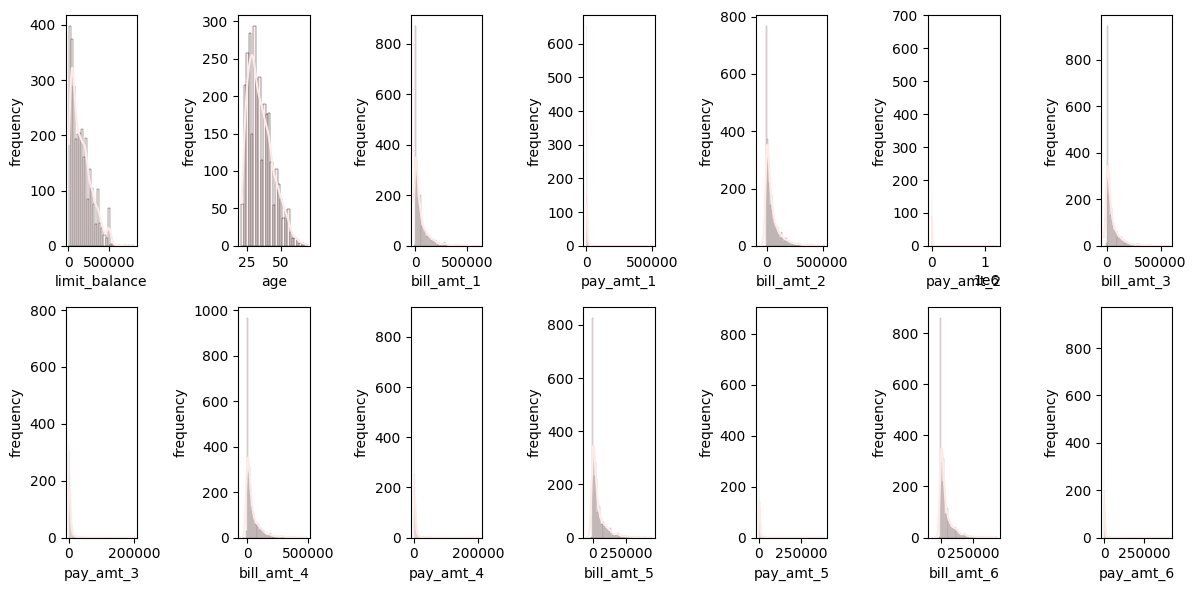

In [19]:
# Membuat canvas
fig, axes = plt.subplots(2, 7, figsize=(12, 6))

# looping histogram
for i, ax in enumerate(axes.flatten()):
    if i < len(num_cols):
        # Membuat histogram
        sns.histplot(data=df, x=num_cols[i], kde=True, color='#ffeaea', alpha=0.7, ax=ax)
        ax.set_xlabel(num_cols[i])
        ax.set_ylabel('frequency')


plt.tight_layout()
plt.show()

Secara garis besar, dapat diketahui bahwa:
- 'age' memiliki rentang umur dari 21-69 tahun dengan rata-rata 35 tahun (rentang mayoritas kurang lebih 25-40 tahun). Informasi ini memberikan gambaran mengenai pengguna kartu kredit. 
- 'limit_balance' memiliki rentang dari \$10,000 - \$800,000 (Dollar NT) dengan rata-rata $163,356. Limit balance juga dapat menggambarkan seberapa tinggi *credit score* seseorang. 
- Pada tiap kolom 'bill_amt_1...6' terlihat ada kenaikan tagihan dari bulan April ('bill_amt_6') hingga September ('bill_amt_1')
- Pada tiap kolom 'pay_amt_1...6' terlihat ada kenaikan yang signifikan pada bulan Agustus ('pay_amt_2') baik dalam rata-rata maupun transaksi maksimal dengan nilai $1,227,082.


**Visualization**

In [20]:
df.age

0       54.0
1       49.0
2       22.0
3       33.0
4       32.0
        ... 
2960    28.0
2961    51.0
2962    38.0
2963    44.0
2964    39.0
Name: age, Length: 2964, dtype: float64

<Axes: xlabel='limit_balance', ylabel='age'>

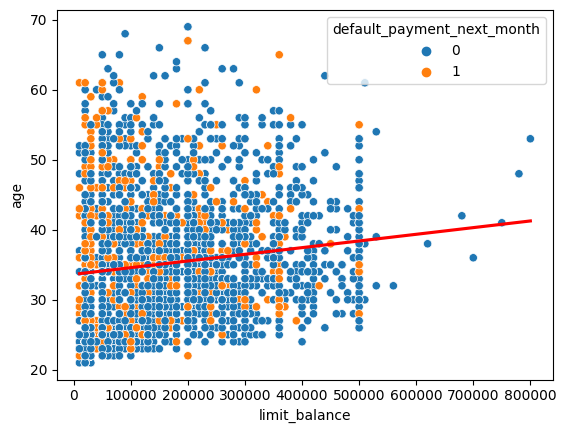

In [21]:
# membuat scatterplot hubungan antara umur, limit_balance, dan default_payment_next_month
sns.scatterplot(x='limit_balance',y='age',data=df,hue='default_payment_next_month')
sns.regplot(x='limit_balance', y='age', data=df, scatter=False, color='r', ci=None)

Tidak ada keterikatan yang begitu signifikan antara umur, limit, dan *default*.

<Axes: xlabel='limit_balance', ylabel='bill_amt_1'>

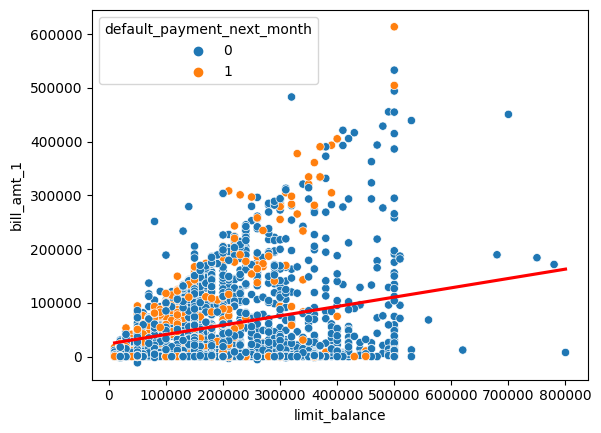

In [22]:
# membuat scatterplot hubungan antara umur, limit_balance, dan default_payment_next_montu
sns.scatterplot(x='limit_balance',y='bill_amt_1',data=df,hue='default_payment_next_month')
sns.regplot(x='limit_balance', y='bill_amt_1', data=df, scatter=False, color='r', ci=None)

Pemilik kartu yang memiliki tagihan tinggi lebih memiliki kecenderungan untuk *default*.

<Axes: xlabel='limit_balance', ylabel='pay_amt_1'>

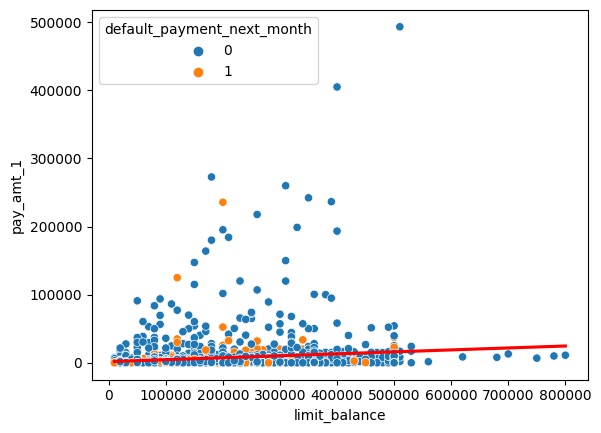

In [23]:
# membuat scatterplot hubungan antara umur, limit_balance, dan default_payment_next_montu
sns.scatterplot(x='limit_balance',y='pay_amt_1',data=df,hue='default_payment_next_month')
sns.regplot(x='limit_balance', y='pay_amt_1', data=df, scatter=False, color='r', ci=None)

Dari hasil eksplorasi dan visualisasi terlihat bahwa:

- Terlihat ada hubungan linear dari data numerikal.
- Ada hubungan antara jumlah tagihan dengan *default payment*.
- Tidak terlihat hubungan yang begitu signifikan antara umur, limit, dan *default payment*.
- Tidak terlihat ada hubungan yang begitu signifikan antara jumlah pembayaran, limit, dan *default payment*.


## Numerical, Categorical, and Target

In [24]:
# melihat rata-rata limit balance berdasarkan status pernikahan
df.groupby(['default_payment_next_month','marital_status'])[['limit_balance']].mean()

limit_balance
default_payment_next_month marital_status               
0                          0               115000.000000
                           1               192653.061224
                           2               159913.180742
                           3               129655.172414
1                          1               134768.211921
                           2               116636.085627
                           3                46666.666667

Dari tabel tersebut terlihat bahwa pemilik kartu kredit dengan status menikah (index = 1) memiliki rata-rata limit balance yang paling tinggi. Selain itu, secara keseluruhan, terlihat bahwa pemilik kartu kredit yang mendapatkan *default payment* sepertinya memiliki limit yang lebih sedikit dibandingkan dengan pemilik yang tidak mengalami masalah pembayaran (bila dikelompokkan berdasarkan status pernikahan).

In [25]:
# melihat rata-rata limit balance berdasarkan level edukasi
df.groupby(['default_payment_next_month','education_level'])[['limit_balance']].mean()

limit_balance
default_payment_next_month education_level               
0                          0                175000.000000
                           1                214123.112660
                           2                156181.474480
                           3                130621.621622
                           4                227692.307692
                           5                160000.000000
                           6                 75000.000000
1                          1                166666.666667
                           2                110263.157895
                           3                104070.796460
                           5                 50000.000000
                           6                 50000.000000

In [26]:
# melihat rata-rata limit balance berdasarkan jenis kelamin
df.groupby(['default_payment_next_month','sex'])[['limit_balance']].mean()

limit_balance
default_payment_next_month sex               
0                          1    170865.704772
                           2    175854.341737
1                          1    117862.595420
                           2    129329.758713

Pada perbandingan dengan level edukasi serta jenis kelamin juga terlihat bahwa pemilik kartu kredit yang mendapatkan *default payment* memiliki limit yang lebih sedikit dibandingkan dengan pemilik yang tidak mengalami masalah pembayaran (index = 0.0). Terlihat juga bahwa lulusan universitas memiliki limit yang lebih tinggi dibanding level edukasi lainnya. Selain itu, tidak ada perbedaan signifikan mengenai limit dengan jenis kelamin pengguna. 

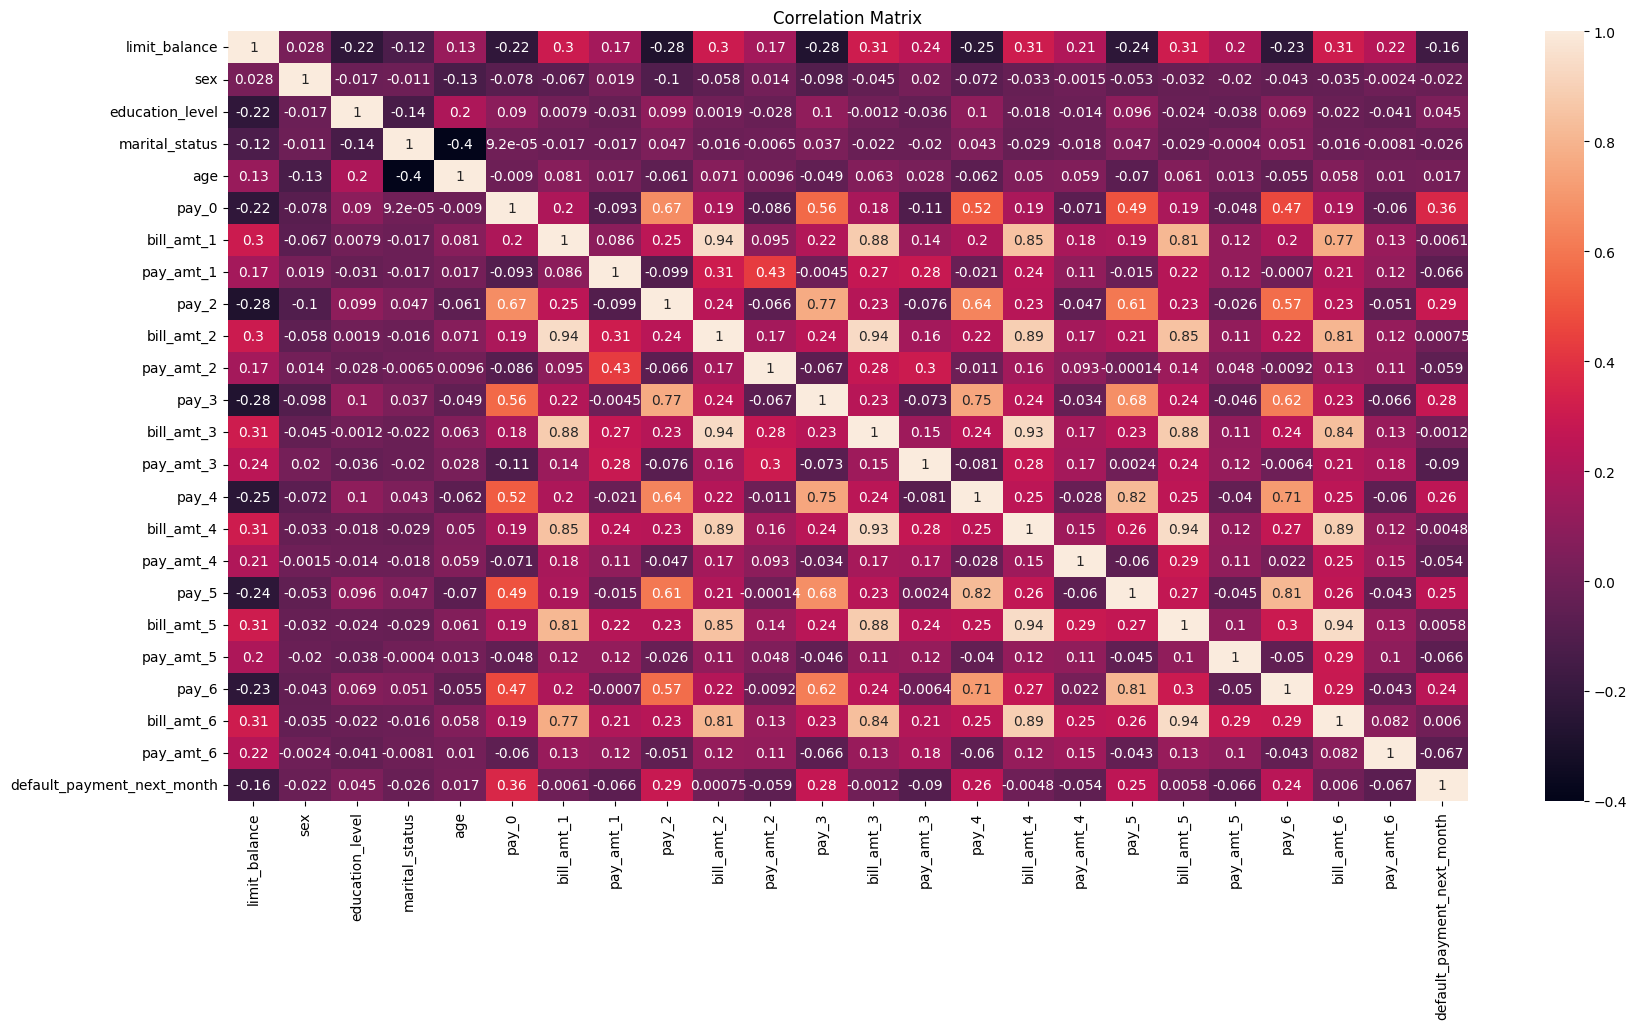

In [27]:
# melihat persebaran korelasi pada data yang sudah di encode
corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

Dari tabel korelasi, terlihat bahwa kolom 'bill_amt_1...6' hanya memiliki sedikit korelasi linear terhadap 'default_payment_next_month'. Namun hal ini belum bisa dijadikan patokan, karena itu mengenai korelasi fitur terhadap target selanjutnya akan dilakukan pada bagian Feature Selection dengan data yang sudah dibersihkan.

**Conclusion**

Dari hasil eksplorasi data, kita telah mengetahui bahwa fitur-fitur memiliki hubungan linear terhadap target. Kami juga telah mengetahui bahwa data target merupakan data kategorikal yang terdiri atas dua kategori atau **biner**. Ukuran data juga termasuk kecil karena memiliki kurang lebih 2964 baris. Dari hasil eksplorasi ini sebenarnya kami sudah dapat memiliki gambaran model mana yang cocok dengan ciri tersebut (linear, biner, dan sebagainya), namun pada proyek kali ini kami akan mencoba tujuh jenis model klasifikasi untuk membuktikan asumsi tersebut. 

# V. Feature Engineering

## Split Train and Test
Pada bagian ini akan dilakukan pemisahan fitur dan target. 

In [28]:
# split Fitur dan target
X= df.drop('default_payment_next_month', axis=1)
y= df['default_payment_next_month']

In [29]:
# Membagi data test dan train
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.3,
                                                  random_state=42, stratify = y)
print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (2074, 23)
test size: (890, 23)


In [30]:
# reset index
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Outlier

Karena selanjutnya akan dilakukan percobaan untuk beberapa model, walaupun tidak semua model sensitif terhadap outlier, tetapi tetap akan dilakukan *handling outlier* guna meminimalisir error pada model yang sensitif terhadap *outlier*.

Penanganan outlier hanya dilakukan pada data numerik asli, dan tidak dilakukan pada data kategorikal yang sudah di-encode.

<Axes: ylabel='Count'>

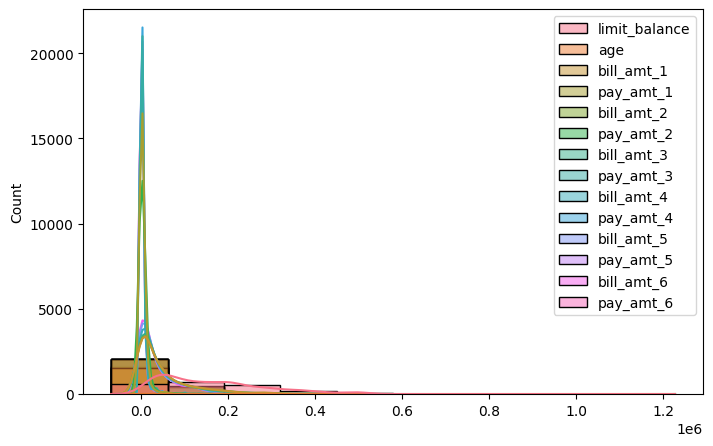

In [31]:
# melihat penyebaran data numerikal secara keseluruhan
fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(ax=axes,data=X_train[num_cols],kde=True, bins=10) # hanya akan menghandle X_train

In [32]:
# membuat fungsi untuk memudahkan visualisasi

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

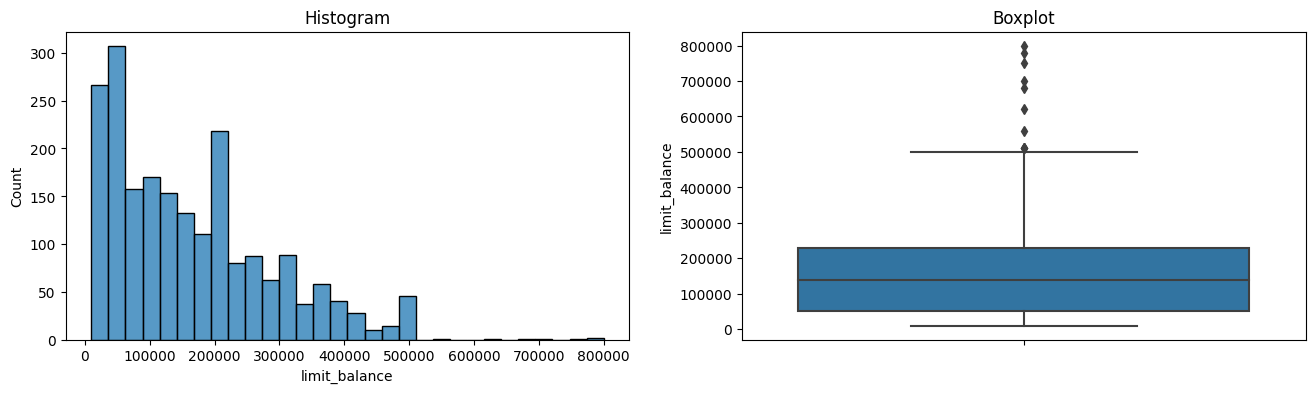

In [33]:
# visualisasi data limit_balance
diagnostic_plots(X_train, 'limit_balance')

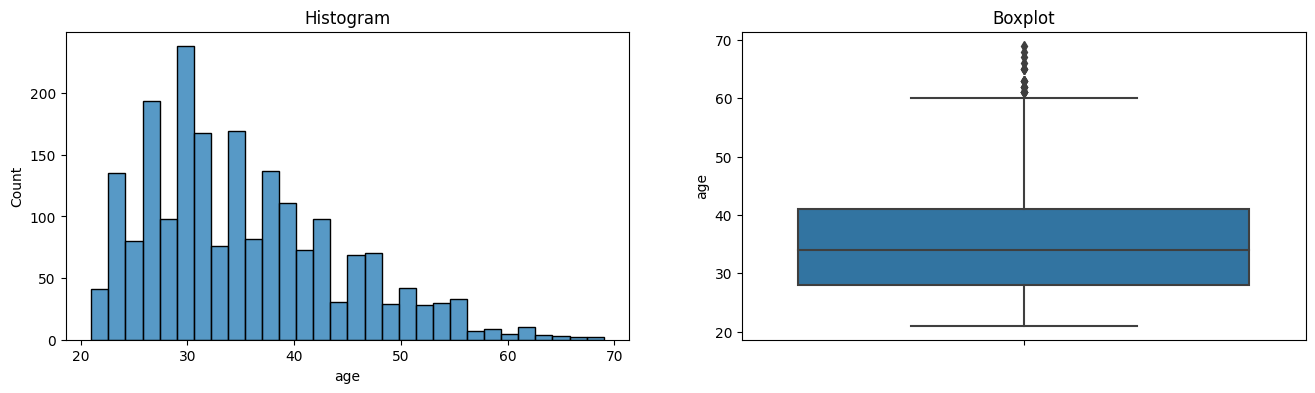

In [34]:
# visualisasi data age
diagnostic_plots(X_train, 'age')

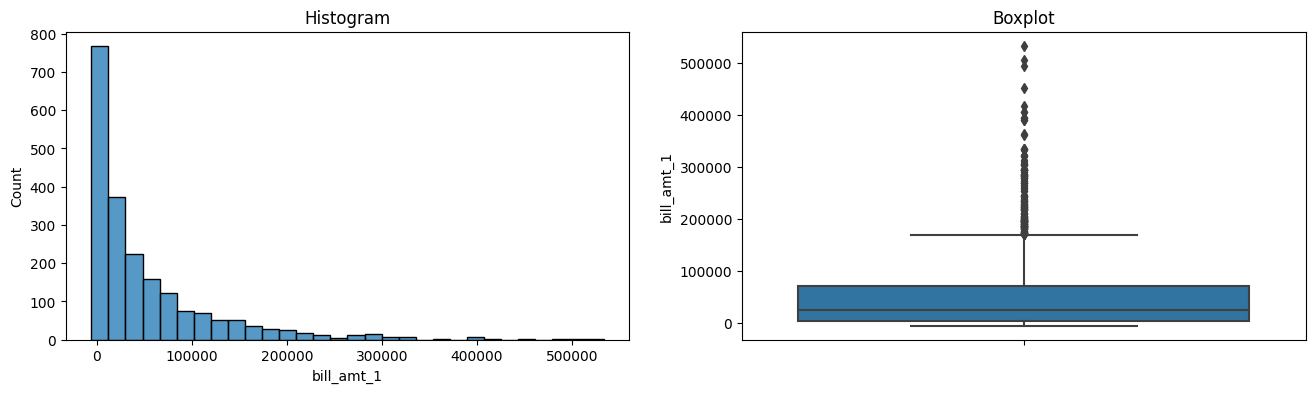

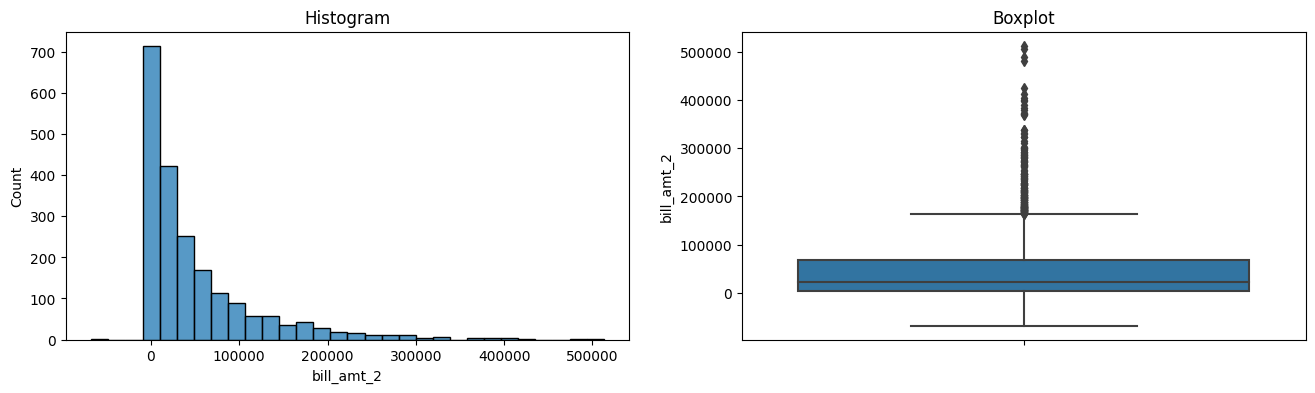

In [35]:
# visualisasi data bill_amt
diagnostic_plots(X_train, 'bill_amt_1')
diagnostic_plots(X_train, 'bill_amt_2')

In [36]:
# melihat bentuk penyebaran data numerikal
X_train[num_cols].apply(lambda x: round(x.skew(), 3))

limit_balance     1.022
age               0.792
bill_amt_1        2.332
pay_amt_1        11.177
bill_amt_2        2.386
pay_amt_2        26.520
bill_amt_3        2.464
pay_amt_3         8.045
bill_amt_4        2.396
pay_amt_4         9.090
bill_amt_5        2.341
pay_amt_5        10.711
bill_amt_6        2.346
pay_amt_6         7.019
dtype: float64

Diketahui bahwa semua data memiiki nilai yang positif, yang berarti persebaran data adalah *skewed right* untuk setiap kolom numerikal. Maka untuk selanjutnya akan dilakukan pendeteksian batas outlier menggunakan Tukeys Rule.

**Capping**

PPerlu dilakukan pendefinisian kolom numerikal agar capping tidak tercampur dan tidak ikut merubah value dari kolom kategorikal yang sebelumnya sudah di-encode menjadi angka.

In [37]:
# membuat capper untuk censoring
windsoriser = Winsorizer(capping_method='iqr', # metode iqr karena semua skewed
                          tail='both',
                          fold = 1.5, # * 1.5 untuk mendapat batas ekstrim, untuk menanggulangi model yang sensitif terhadap outlier karena model yang dipakai akan beragam
                          variables=['limit_balance', 'age', 'bill_amt_1', 'pay_amt_1',
                                    'bill_amt_2', 'pay_amt_2', 'bill_amt_3', 'pay_amt_3',
                                    'bill_amt_4', 'pay_amt_4','bill_amt_5', 'pay_amt_5',
                                    'bill_amt_6', 'pay_amt_6'])
windsoriser.fit(X_train)

# menaruh pada variabel baru
X_train_no_outlier = windsoriser.transform(X_train)

In [38]:
# mengecek value terkecil
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# mengecek value terbesar, kini sudah sama dengan batas
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'limit_balance': -220000.0, 'age': 8.5, 'bill_amt_1': -95120.5, 'pay_amt_1': -5336.125, 'bill_amt_2': -93179.375, 'pay_amt_2': -5061.75, 'bill_amt_3': -86418.375, 'pay_amt_3': -5848.75, 'bill_amt_4': -83158.375, 'pay_amt_4': -5194.375, 'bill_amt_5': -76012.375, 'pay_amt_5': -5224.875, 'bill_amt_6': -74250.125, 'pay_amt_6': -5712.0}
Right Tail Caps :  {'limit_balance': 500000.0, 'age': 60.5, 'bill_amt_1': 169385.5, 'pay_amt_1': 11742.875, 'bill_amt_2': 164391.625, 'pay_amt_2': 11110.25, 'bill_amt_3': 153794.625, 'pay_amt_3': 11225.25, 'bill_amt_4': 146266.625, 'pay_amt_4': 9526.625, 'bill_amt_5': 132014.625, 'pay_amt_5': 9748.125, 'bill_amt_6': 127590.875, 'pay_amt_6': 10224.0}


In [39]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

limit_balance - Before Capping


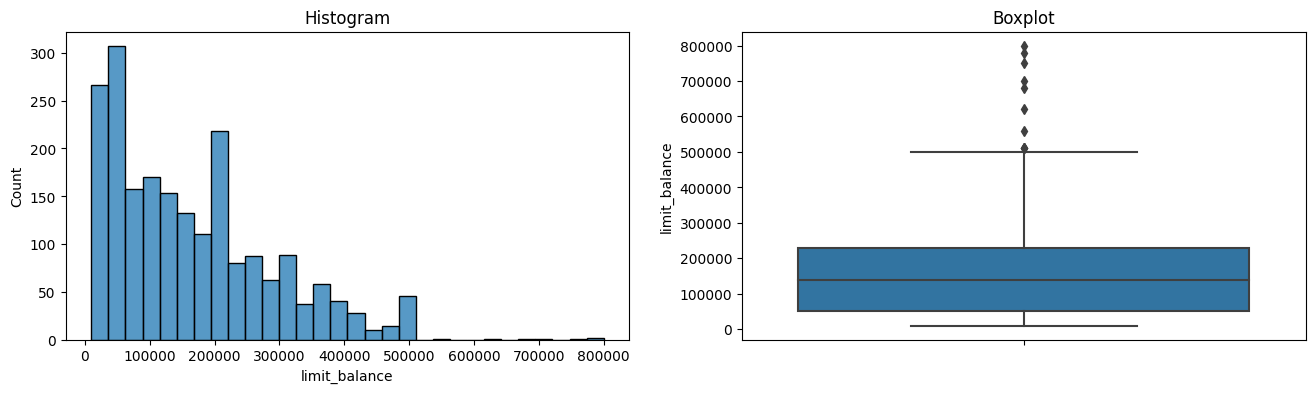


limit_balance - After Capping


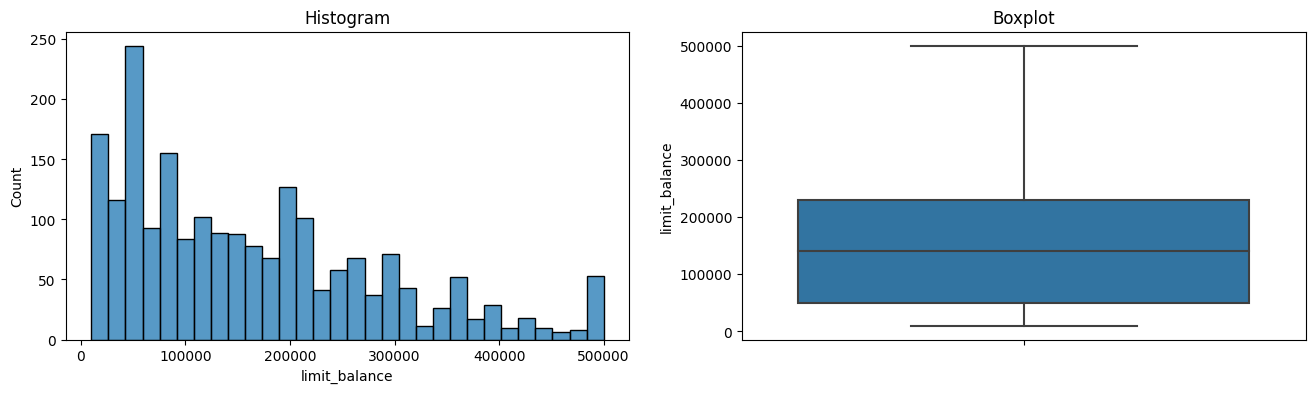

In [40]:
# Perbedaan persebaran sebelum dan sesudah capping
print('limit_balance - Before Capping')
diagnostic_plots(X_train, 'limit_balance')
print('\nlimit_balance - After Capping')
diagnostic_plots(X_train_no_outlier, 'limit_balance')

<Axes: ylabel='Count'>

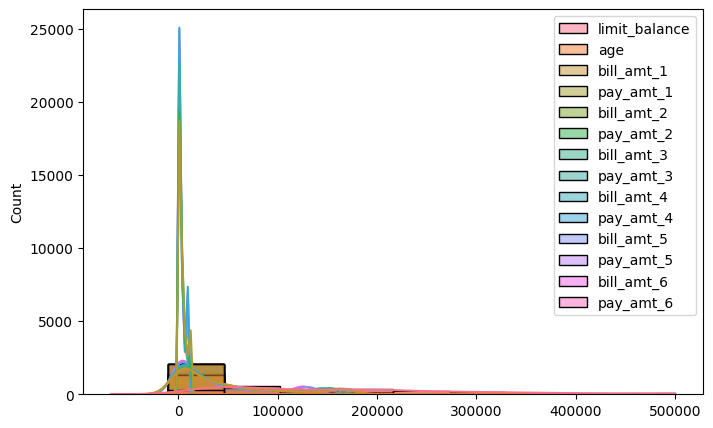

In [41]:
# melihat penyebaran data numerikal secara keseluruhan
fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(ax=axes,data=X_train_no_outlier[num_cols],kde=True, bins=10) # hanya akan menghandle X_train

In [42]:
# melihat bentuk penyebaran data numerikal
X_train_no_outlier[num_cols].apply(lambda x: round(x.skew(), 3))

limit_balance    0.870
age              0.731
bill_amt_1       1.196
pay_amt_1        1.048
bill_amt_2       1.190
pay_amt_2        1.024
bill_amt_3       1.172
pay_amt_3        1.228
bill_amt_4       1.184
pay_amt_4        1.164
bill_amt_5       1.174
pay_amt_5        1.187
bill_amt_6       1.182
pay_amt_6        1.207
dtype: float64

Persebaran tiap data numerikal sudah mendekati normal. 

In [43]:
# melihat jumlah baris sebelum
X_train.shape

(2074, 23)

In [44]:
# meliihat jumlah baris
X_train_no_outlier.shape

(2074, 23)

Outlier sudah ditangani tanpa mengurangi jumlah baris data. 

## Feature Selection

Akan dilakukan beberapa teknik untuk pemilihan fitur, yakni Chi-square dan ANOVA. Karena data asli sudah ditransformasikan ke dalam bentuk angka, maka dapat dilakukan uji korelasi Pearson. 

**Extra Trees**

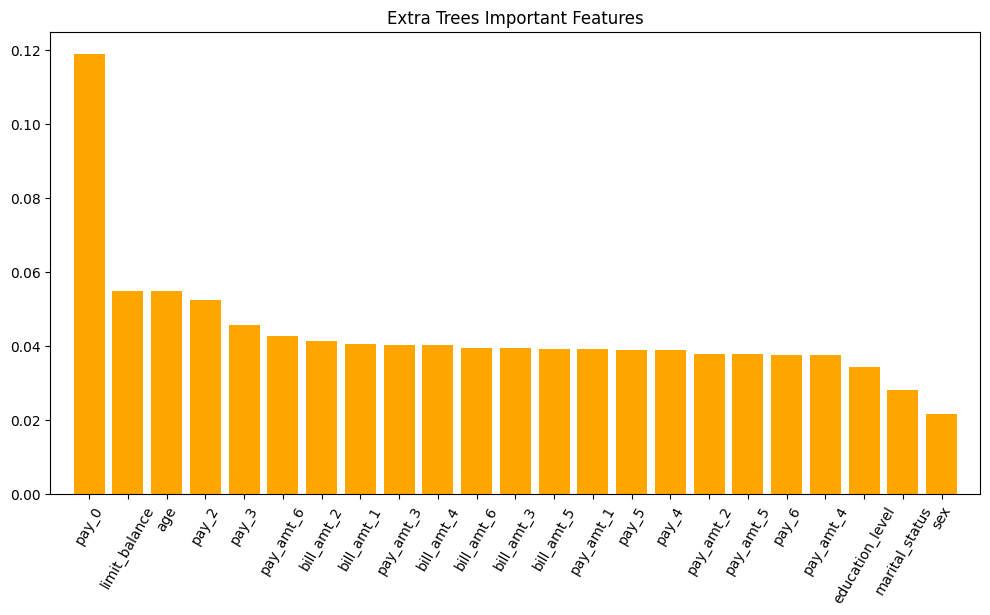

In [45]:
# definisi selektor
et_class = ExtraTreesClassifier(n_estimators=400)
et_class.fit(X_train, y_train)

# sort sesuai fitur yang paling penting
sort_fit = np.argsort(et_class.feature_importances_)
sort_fit = sort_fit[::-1]

# show plot
plt.figure(figsize=(12,6))
plt.title("Extra Trees Important Features")
plt.bar(range(X_train.shape[1]), et_class.feature_importances_[sort_fit],color="orange", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sort_fit], rotation=60)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Bila menggunakan Extra Trees Classifier, terlihat bahwa tiga fitur yang paling penting adalah 'pay_0', 'limit_balance', dan 'age'. Selektor ini memiliki ciri yang robust terhadap outlier, namun selektor ini sebenarnya lebih ditujukan untuk model Decision Tree, sementara kali ini kami akan melakukan berbagai jenis model pada proyek kali ini. Maka akan dilakukan juga uji dengan metrik lainnya. 

**Chi-Square**

In [46]:
# melakukan chi-square terhadap target
chi_scores = []
for column in cat_cols:
    contingency_table = pd.crosstab(df[column], df['default_payment_next_month'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_scores.append((column, p))

# sort berdasarkan p-value
chi_scores.sort(key=lambda x: x[1])

# print
for chi in chi_scores:
    print(f"Feature: {chi[0]}, p-value: {chi[1]}")

Feature: default_payment_next_month, p-value: 0.0
Feature: pay_0, p-value: 1.556692201428874e-131
Feature: pay_2, p-value: 5.829611638362242e-79
Feature: pay_3, p-value: 2.092858920053285e-68
Feature: pay_4, p-value: 5.1684799843466086e-61
Feature: pay_5, p-value: 1.7522473441424544e-60
Feature: pay_6, p-value: 1.164490951196713e-51
Feature: education_level, p-value: 2.911281342948072e-05
Feature: sex, p-value: 0.25782081791921546
Feature: marital_status, p-value: 0.3179553641229075


Bila menggunakan Chi-square, terlihat bahwa semua data fitur memiliki p-value kurang dari 0 yang mengartikan bahwa **semua** fitur kategorikal berhuungan dengan target. Bila diberi tingkatan, 'pay_0' serta kolom 'pay' lainnya menjadi faktor yang paling berpengaruh, terlihat dari nilai p-value Chi-Square yang kecil (biasanya dibawah 0.05). Tolak hipotesis null berarti menandakan ada dependensi dari fitur dan target.


**VIF**

In [47]:
# membuat fungsi VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=True)
    return(vif)

In [48]:
# kalkulasi vif
calc_vif(X_train_no_outlier)

,variables,VIF
5,pay_0,2.014402
22,pay_amt_6,2.989985
8,pay_2,3.596900
20,pay_6,3.628268
19,pay_amt_5,3.660102
16,pay_amt_4,4.038349
11,pay_3,4.052824
0,limit_balance,4.289356
13,pay_amt_3,4.413017
14,pay_4,4.642250


Bila dilihat menggunakan VIF, fitur 'bill_amt_5' hingga 'age' memiliki VIF lebih dari 10. Hal ini dapat menandakan adanya *multicollinearity*--yaitu sejauh mana variabel independen dalam model regresi berkorelasi satu sama lain.

**ANOVA**

Selanjutnya dalam melakukan pengecekan fitur numerikal, tidak tiperlukan lagi transformasi data target (kategorikal) menjadi numerikal agar dapat dilakukan uji ANOVA karena data target sudah di-encode.

In [49]:
# melakukan pemilihan ANOVA untuk data numerikal
selector = SelectKBest(score_func=f_regression, k='all') 
selector.fit(X_train_no_outlier[num_cols], y_train)
df_scores = pd.DataFrame({'Num Feature': X_train_no_outlier[num_cols].columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

# mengurutkan data
df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

,Num Feature,Score,p-value
0,limit_balance,65.614539,0.0000
5,pay_amt_2,43.689295,0.0000
3,pay_amt_1,42.856999,0.0000
7,pay_amt_3,40.512416,0.0000
13,pay_amt_6,38.679231,0.0000
9,pay_amt_4,30.988004,0.0000
11,pay_amt_5,22.150355,0.0000
1,age,2.797920,0.0945
2,bill_amt_1,1.145947,0.2845
8,bill_amt_4,1.070119,0.3010


Tabel diatas merupakan tabel yang mengurutkan kolom dengan skor ANOVA tertinggi (paling relevan dengan target) hingga paling rendah (kurang relevan). Sementara itu, kolom 'bill_amt_4' dan seterusnya memiliki p-value yang lebih rendah dan dapat dianggap bukan kolom yang sangat relevan terhadap target. 

**Interest**


Tiap-tiap uji seleksi akan memberikan nilai yang sedikit berbeda atau sangat berbeda; misalnya saat uji ANOVA, 'limit_balance' dianggap sebagai fitur paling relevan sementara saat uji VIF 'limit_balance' bukan merupakan faktor paling relevan. Hal ini tentu diakibatkan karena tiap-tiap uji memiliki kebutuhan masing-masing, seperti bagaimana VIF diperuntukkan untuk melihat keterhubungan linear. Dalam hal ini, karena kami akan melakukan uji coba untuk beberapa model, maka mereferensikan salah satu selektor akan memungkinkan timbulnya bias. Namun dengan mengetahui resiko tersebut, kami tetap memutuskan untuk **melepaskan** kolom 'bill_1...6' yang dianggap kurang relevan oleh beberapa selektor. 

**Final Feature**

In [50]:
X_train.columns.tolist()

['limit_balance',
 'sex',
 'education_level',
 'marital_status',
 'age',
 'pay_0',
 'bill_amt_1',
 'pay_amt_1',
 'pay_2',
 'bill_amt_2',
 'pay_amt_2',
 'pay_3',
 'bill_amt_3',
 'pay_amt_3',
 'pay_4',
 'bill_amt_4',
 'pay_amt_4',
 'pay_5',
 'bill_amt_5',
 'pay_amt_5',
 'pay_6',
 'bill_amt_6',
 'pay_amt_6']

In [51]:
cols_drop = ['bill_amt_4','bill_amt_3','bill_amt_1','bill_amt_5','bill_amt_6', 'bill_amt_2']
final_feature = [col for col in X_train.columns if col not in cols_drop]

In [52]:
X_train_final= X_train_no_outlier[final_feature]
X_test_final= X_test[final_feature]
X_train_final.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_amt_1,pay_2,pay_amt_2,pay_3,pay_amt_3,pay_4,pay_amt_4,pay_5,pay_amt_5,pay_6,pay_amt_6
0,80000.0,2,1,2,23.0,-1.0,6687.0,-1.0,1000.0,0.0,0.0,0.0,4318.0,-1.0,0.0,-1.0,254.0
1,110000.0,2,2,1,34.0,0.0,1300.0,0.0,1280.0,0.0,600.0,0.0,1005.0,0.0,709.0,0.0,732.0
2,210000.0,2,1,2,27.0,-1.0,2000.0,0.0,1985.0,0.0,1300.0,0.0,0.0,2.0,2040.0,-1.0,4081.0


In [53]:
X_test_final.shape

(890, 17)

Fitur yang akan digunakan nantinya ada 17 kolom. 

# VI. Model Definition

Akan dilakukan percobaan dengan tujuh model. Model tersebut serta deskripsi singkatnya adalah:

1. **Regresi Logistik**: Pengklasifikasi linear yang digunakan untuk masalah klasifikasi biner.

2. **Support Vector Classifier (SVC)**: Varian SVM yang dapat menangani masalah klasifikasi biner dan multiclass. Menggunakan support vector untuk membuat *decision boundary*.

3. **Decision Tree**: Model non-parametrik yang membagi fitur berdasarkan keputusan. 

4. **Random Forest**: Model ensemble yang terdiri dari Decision Tree.

5. **K-Nearest Neighbors (KNN)**: Mengklasifikasikan target berdasarkan kedekatannya dengan label di ruang fitur.

6. **Naive Bayes**: Naive Bayes mengasumsikan independensi antar fitur (dimana fitur tidak dianggap berhubungan satu sama lain).

7. **AdaBoost**: Model ensemble yang menggabungkan model lemah untuk meningkatkan kinerja secara keseluruhan.

### Define Pipeline

In [54]:
# default logreg
def_log_reg = Pipeline([('scaling', MinMaxScaler()), # karena persebaran data tidak normal
                         ('classifier', LogisticRegression(random_state=66))])

# default svc
def_svc = Pipeline([('scaling', MinMaxScaler()),
                     ('classifier', SVC(random_state=66))])

# default Decision Tree
def_dt = Pipeline([('scaling', MinMaxScaler()),
                     ('classifier', DecisionTreeClassifier(random_state=66))])

# default random forest
def_rf = Pipeline([('scaling', MinMaxScaler()),
                    ('classifier', RandomForestClassifier(random_state=66))])

# default K nearest neighbours
def_knn = Pipeline([('scaling', MinMaxScaler()),
                     ('classifier', KNeighborsClassifier())])

# default naive bayes
def_nb = Pipeline([('scaling', MinMaxScaler()),
                     ('classifier', GaussianNB())])    
# default adaboost
def_adaboost = Pipeline([('scaler', MinMaxScaler()),  
                         ('classifier', AdaBoostClassifier(random_state=66))])

# VII. Model Training

In [55]:
# train model default
def_log_reg.fit(X_train_final, y_train)
def_svc.fit(X_train_final, y_train)
def_dt.fit(X_train_final, y_train)
def_rf.fit(X_train_final, y_train)
def_knn.fit(X_train_final, y_train)
def_nb.fit(X_train_final, y_train)
def_adaboost.fit(X_train_final, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', AdaBoostClassifier(random_state=66))])

### Logistic Regresion

In [56]:
# define model
def_log_reg.fit(X_train_final, y_train)

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('classifier', LogisticRegression(random_state=66))])

In [57]:
# prediksi
y_logreg_train_pred = def_log_reg.predict(X_train_final)
y_logreg_test_pred = def_log_reg.predict(X_test_final)

In [58]:
# melihat skor akurasi
print('Training Score: ',round(def_log_reg.score(X_train_final, y_train),4))
print('Testing Score: ', round(def_log_reg.score(X_test_final, y_test),4))

Training Score:  0.8235
Testing Score:  0.8157


**Cross Validation**

Classification Report Logistic Regression Default - TRAIN
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1630
           1       0.75      0.26      0.39       444

    accuracy                           0.82      2074
   macro avg       0.79      0.62      0.64      2074
weighted avg       0.81      0.82      0.79      2074

F1 Score - All - Cross Validation  :  [0.37305699 0.3125     0.37623762]
F1 Score - Mean - Cross Validation :  0.3539315395270097
F1 Score - Std - Cross Validation  :  0.029325284321475187
F1 Score - Range :  0.3246062552055345 - 0.38325682384848486
Confusion Matrix      : 


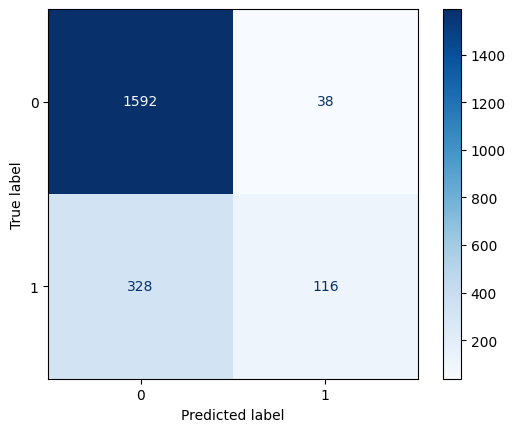

In [59]:
# Classification report tanpa menggunakan hyperparameter
print('Classification Report Logistic Regression Default - TRAIN')
print(classification_report(y_train, y_logreg_train_pred))

# Cross Validation dengan `cross_val_score`
from sklearn.model_selection import cross_val_score

f1_cv_logreg = cross_val_score(def_log_reg, # modellog
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_logreg)
print('F1 Score - Mean - Cross Validation : ', f1_cv_logreg.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_logreg.std())
print('F1 Score - Range : ', (f1_cv_logreg.mean()-f1_cv_logreg.std()) , '-', (f1_cv_logreg.mean()+f1_cv_logreg.std()))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(def_log_reg, X_train_final, y_train, cmap='Blues'))

Classification Report Logistic Regression Default - TEST : 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       699
           1       0.68      0.26      0.38       191

    accuracy                           0.82       890
   macro avg       0.76      0.61      0.64       890
weighted avg       0.80      0.82      0.78       890
 

Confusion Matrix      : 


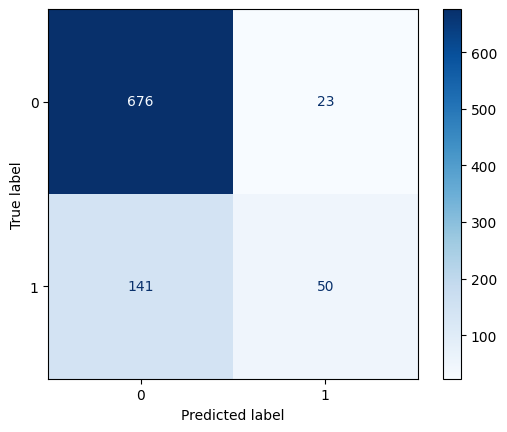

In [60]:
# Check setelah cross-val
y_pred_test_logreg = def_log_reg.predict(X_test_final)
# print report
print('Classification Report Logistic Regression Default - TEST : \n', classification_report(y_test, y_pred_test_logreg), '\n')
# visualisasi confusion matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(def_log_reg, X_test_final, y_test, cmap='Blues'))

Model logistik linear memiliki tendensi good fit jika dibandingkan train dan test set. Model dapat memprediksi index 0 dengan baik (89%), namun kurang dapat dapat memprediksi index 1 dengan baik (38%)

### SVC

In [61]:
# define model
def_svc.fit(X_train_final, y_train)

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('classifier', SVC(random_state=66))])

In [62]:
# prediksi
y_svc_train_pred = def_svc.predict(X_train_final)
y_svc_test_pred = def_svc.predict(X_test_final)

In [63]:
# melihat skor akurasi
print('Training Score: ',round(def_svc.score(X_train_final, y_train),4))
print('Testing Score: ', round(def_svc.score(X_test_final, y_test),4))

Training Score:  0.8337
Testing Score:  0.8191


**Cross Validation**

Classification Report SVC Default - TRAIN
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1630
           1       0.78      0.31      0.44       444

    accuracy                           0.83      2074
   macro avg       0.81      0.64      0.67      2074
weighted avg       0.83      0.83      0.80      2074

F1 Score - All - Cross Validation  :  [0.4        0.38383838 0.37254902]
F1 Score - Mean - Cross Validation :  0.385462467815409
F1 Score - Std - Cross Validation  :  0.011265502435783553
F1 Score - Range       :  0.37419696537962543 - 0.39672797025119255
Confusion Matrix: 


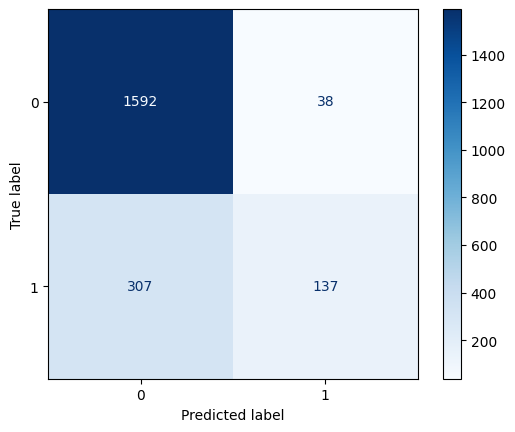

In [64]:
# Classification report tanpa menggunakan hyperparameter
print('Classification Report SVC Default - TRAIN')
print(classification_report(y_train, y_svc_train_pred))

# Cross Validation dengan `cross_val_score`
from sklearn.model_selection import cross_val_score

f1_cv_svc = cross_val_score(def_svc, # modellog
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_svc)
print('F1 Score - Mean - Cross Validation : ', f1_cv_svc.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_svc.std())
print('F1 Score - Range       : ', (f1_cv_svc.mean()-f1_cv_svc.std()) , '-', (f1_cv_svc.mean()+f1_cv_svc.std()))
# visualisasi confusion matrix
print('Confusion Matrix: \n', ConfusionMatrixDisplay.from_estimator(def_svc, X_train_final, y_train, cmap='Blues'))

Classification Report SVC Default - TEST: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       699
           1       0.69      0.29      0.41       191

    accuracy                           0.82       890
   macro avg       0.76      0.63      0.65       890
weighted avg       0.80      0.82      0.79       890
 

Confusion Matrix : 


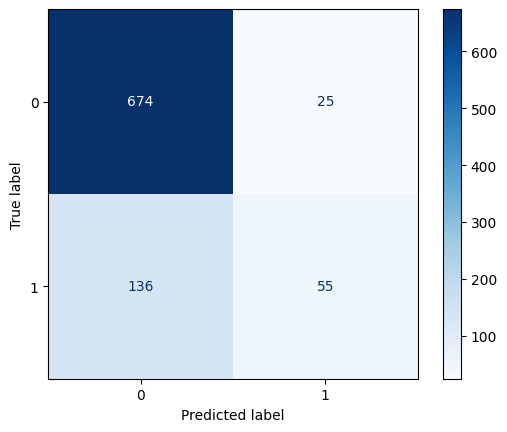

In [65]:
# Check setelah cross-val
y_pred_test_svc = def_svc.predict(X_test_final)
# print report
print('Classification Report SVC Default - TEST: \n', classification_report(y_test, y_pred_test_svc), '\n')
# visualisasi confusion matrix
print('Confusion Matrix : \n', ConfusionMatrixDisplay.from_estimator(def_svc, X_test_final, y_test, cmap='Blues'))

Model SVM memiliki tendensi overfit jika dibandingkan train dan test set. Model dapat memprediksi index 0 dengan baik (89%), namun kurang dapat dapat memprediksi index 1 dengan baik (41%)

### Decision Tree

In [66]:
# define model
def_dt.fit(X_train_final, y_train)

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('classifier', DecisionTreeClassifier(random_state=66))])

In [67]:
# prediksi
y_dt_train_pred = def_dt.predict(X_train_final)
y_dt_test_pred = def_dt.predict(X_test_final)

In [68]:
# melihat skor akurasi
print('Training Score: ',round(def_dt.score(X_train_final, y_train),4))
print('Testing Score: ', round(def_dt.score(X_test_final, y_test),4))

Training Score:  1.0
Testing Score:  0.7281


**Cross Validation**

Classification Report Decision Tree Default - TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2074
   macro avg       1.00      1.00      1.00      2074
weighted avg       1.00      1.00      1.00      2074

F1 Score - All - Cross Validation  :  [0.45079365 0.42244224 0.39228296]
F1 Score - Mean - Cross Validation :  0.4218396177391434
F1 Score - Std - Cross Validation  :  0.023890690738954584
F1 Score - Range :  0.3979489270001888 - 0.445730308478098
Confusion Matrix      : 


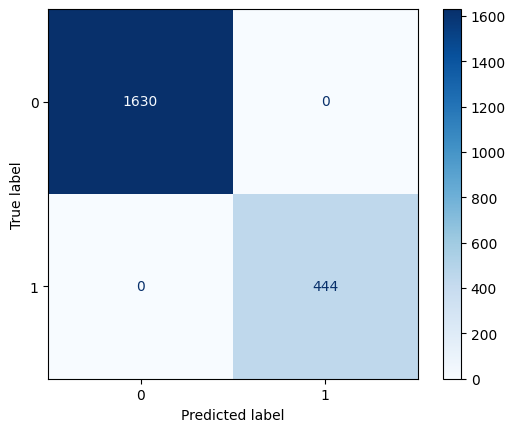

In [69]:
# Classification report tanpa menggunakan hyperparameter
print('Classification Report Decision Tree Default - TRAIN')
print(classification_report(y_train, y_dt_train_pred))

# Cross Validation dengan `cross_val_score`
from sklearn.model_selection import cross_val_score

f1_cv_dt = cross_val_score(def_dt, # modellog
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_dt)
print('F1 Score - Mean - Cross Validation : ', f1_cv_dt.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_dt.std())
print('F1 Score - Range : ', (f1_cv_dt.mean()-f1_cv_dt.std()) , '-', (f1_cv_dt.mean()+f1_cv_dt.std()))
# visualisasi confusion matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(def_dt, X_train_final, y_train, cmap='Blues'))

Classification Report Decision Tree Default - TEST : 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       699
           1       0.38      0.43      0.41       191

    accuracy                           0.73       890
   macro avg       0.61      0.62      0.62       890
weighted avg       0.74      0.73      0.73       890
 

Confusion Matrix      : 


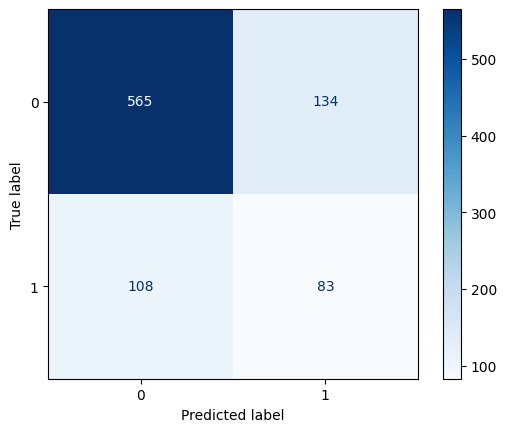

In [70]:
# Check setelah cross-val
y_pred_test_dt = def_dt.predict(X_test_final)
# print report
print('Classification Report Decision Tree Default - TEST : \n', classification_report(y_test, y_pred_test_dt), '\n')
# visualisasi confusion matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(def_dt, X_test_final, y_test, cmap='Blues'))

Model Decision Tree memiliki tendensi overfit jika dibandingkan train dan test set. Model dapat memprediksi index 0 dengan baik (82%), namun kurang dapat dapat memprediksi index 1 dengan baik (41%)

### Random Forest

In [71]:
# define model
def_rf.fit(X_train_final, y_train)

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('classifier', RandomForestClassifier(random_state=66))])

In [72]:
# prediksi
y_rf_train_pred = def_rf.predict(X_train_final)
y_rf_test_pred = def_rf.predict(X_test_final)

In [73]:
# melihat skor akurasi
print('Training Score: ',round(def_rf.score(X_train_final, y_train),4))
print('Testing Score: ', round(def_rf.score(X_test_final, y_test),4))

Training Score:  1.0
Testing Score:  0.8191


**Cross Validation**

Classification Report Random Forest Default - TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      1.00      1.00       444

    accuracy                           1.00      2074
   macro avg       1.00      1.00      1.00      2074
weighted avg       1.00      1.00      1.00      2074

F1 Score - All - Cross Validation  :  [0.53043478 0.50632911 0.5       ]
F1 Score - Mean - Cross Validation :  0.5122546321775822
F1 Score - Std - Cross Validation  :  0.013112406924724445
F1 Score - Range :  0.49914222525285773 - 0.5253670391023066
Confusion Matrix      : 


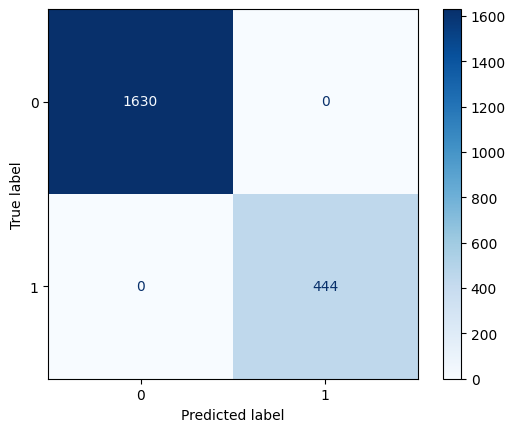

In [74]:
# Classification report tanpa menggunakan hyperparameter
print('Classification Report Random Forest Default - TRAIN')
print(classification_report(y_train, y_rf_train_pred))

# Cross Validation dengan `cross_val_score`
from sklearn.model_selection import cross_val_score

f1_cv_rf = cross_val_score(def_rf, # modellog
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_rf)
print('F1 Score - Mean - Cross Validation : ', f1_cv_rf.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_rf.std())
print('F1 Score - Range : ', (f1_cv_rf.mean()-f1_cv_rf.std()) , '-', (f1_cv_rf.mean()+f1_cv_rf.std()))
# visualisasi confusion matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(def_rf, X_train_final, y_train, cmap='Blues'))

Classification Report Random Forest Default - TEST: 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       699
           1       0.61      0.43      0.50       191

    accuracy                           0.82       890
   macro avg       0.73      0.68      0.70       890
weighted avg       0.80      0.82      0.81       890
 

Confusion Matrix : 


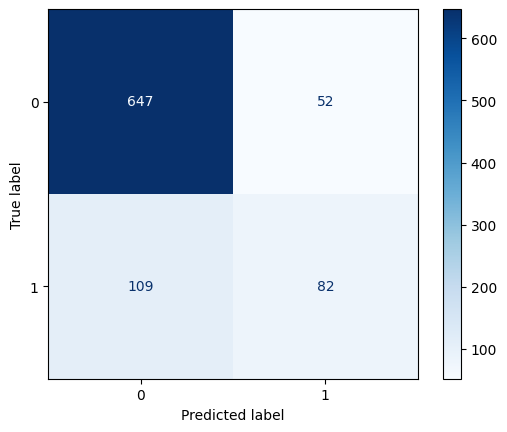

In [75]:
# Check setelah cross-val
y_pred_test_rf = def_rf.predict(X_test_final)
# print report
print('Classification Report Random Forest Default - TEST: \n', classification_report(y_test, y_pred_test_rf), '\n')
# visualisasi confusion matrix
print('Confusion Matrix : \n', ConfusionMatrixDisplay.from_estimator(def_rf, X_test_final, y_test, cmap='Blues'))

Model Random Forest memiliki tendensi good fit jika dibandingkan train dan test set. Namun ada ketidakseimbangan, dimana mobil dapat memprediksi index 0 dengan baik (89%), namun kurang dapat dapat memprediksi index 1 dengan baik (50%)

### KNN

In [76]:
# define model
def_knn.fit(X_train_final, y_train)

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('classifier', KNeighborsClassifier())])

In [77]:
# prediksi
y_knn_train_pred = def_knn.predict(X_train_final)
y_knn_test_pred = def_knn.predict(X_test_final)

In [78]:
# melihat skor akurasi
print('Training Score: ',round(def_knn.score(X_train_final, y_train),4))
print('Testing Score: ', round(def_knn.score(X_test_final, y_test),4))

Training Score:  0.8385
Testing Score:  0.8


**Cross Validation**

Classification Report KNN Default - TRAIN
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1630
           1       0.76      0.36      0.49       444

    accuracy                           0.84      2074
   macro avg       0.81      0.66      0.69      2074
weighted avg       0.83      0.84      0.81      2074

F1 Score - All - Cross Validation  :  [0.32850242 0.39090909 0.31067961]
F1 Score - Mean - Cross Validation :  0.34336370600617117
F1 Score - Std - Cross Validation  :  0.03439802129070535
F1 Score - Range  :  0.3089656847154658 - 0.3777617272968765
Confusion Matrix : 


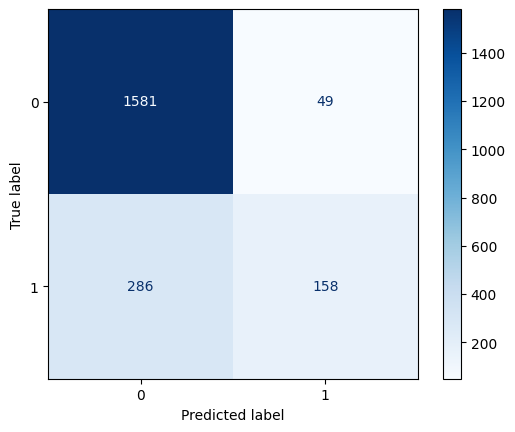

In [79]:
# Classification report tanpa menggunakan hyperparameter
print('Classification Report KNN Default - TRAIN')
print(classification_report(y_train, y_knn_train_pred))

# Cross Validation dengan `cross_val_score`
from sklearn.model_selection import cross_val_score

f1_cv_knn = cross_val_score(def_knn, # modellog
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_knn)
print('F1 Score - Mean - Cross Validation : ', f1_cv_knn.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_knn.std())
print('F1 Score - Range  : ', (f1_cv_knn.mean()-f1_cv_knn.std()) , '-', (f1_cv_knn.mean()+f1_cv_knn.std()))
# visualisasi confusion matrix
print('Confusion Matrix : \n', ConfusionMatrixDisplay.from_estimator(def_knn, X_train_final, y_train, cmap='Blues'))

Classification Report KNN Default - TEST: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       699
           1       0.57      0.29      0.38       191

    accuracy                           0.80       890
   macro avg       0.70      0.61      0.63       890
weighted avg       0.77      0.80      0.77       890
 

Confusion Matrix      : 


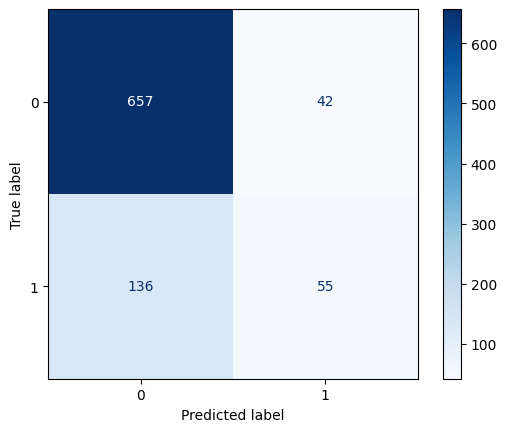

In [80]:
# Check setelah cross-val
y_pred_test_knn = def_knn.predict(X_test_final)
# print report
print('Classification Report KNN Default - TEST: \n', classification_report(y_test, y_pred_test_knn), '\n')
# visualisasi 
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(def_knn, X_test_final, y_test, cmap='Blues'))

Model logistik linear memiliki tendensi overfit jika dibandingkan train dan test set. Namun ada ketidakseimbangan, dimana mobil dapat memprediksi index 0 dengan baik (88%), namun kurang dapat dapat memprediksi index 1 dengan baik (38%)

### Naive Bayes

In [81]:
# define model
def_nb.fit(X_train_final, y_train)

Pipeline(steps=[('scaling', MinMaxScaler()), ('classifier', GaussianNB())])

In [82]:
# prediksi
y_nb_train_pred = def_nb.predict(X_train_final)
y_nb_test_pred = def_nb.predict(X_test_final)

In [83]:
# melihat akurasi
print('Training Score: ',round(def_nb.score(X_train_final, y_train),4))
print('Testing Score: ', round(def_nb.score(X_test_final, y_test),4))

Training Score:  0.8071
Testing Score:  0.7708


**Cross Validation**

Classification Report Naive Bayes Default - TRAIN
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1630
           1       0.55      0.52      0.53       444

    accuracy                           0.81      2074
   macro avg       0.71      0.70      0.71      2074
weighted avg       0.80      0.81      0.80      2074

F1 Score - All - Cross Validation  :  [0.54966887 0.52264808 0.50179211]
F1 Score - Mean - Cross Validation :  0.5247030241637397
F1 Score - Std - Cross Validation  :  0.01959954268119984
F1 Score - Range   :  0.5051034814825399 - 0.5443025668449395
Confusion Matrix      : 


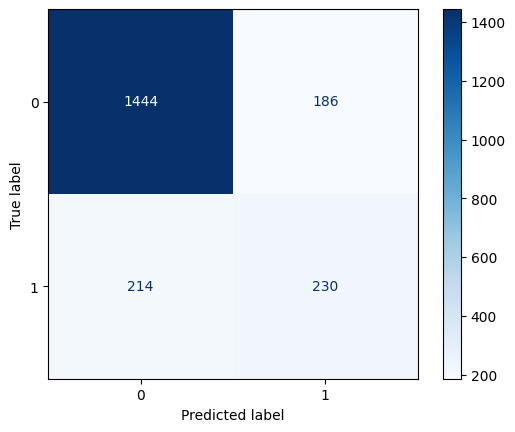

In [84]:
# Classification report tanpa menggunakan hyperparameter
print('Classification Report Naive Bayes Default - TRAIN')
print(classification_report(y_train, y_nb_train_pred))

# Cross Validation dengan `cross_val_score`
from sklearn.model_selection import cross_val_score

f1_cv_nb = cross_val_score(def_nb, # modellog
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_nb)
print('F1 Score - Mean - Cross Validation : ', f1_cv_nb.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_nb.std())
print('F1 Score - Range   : ', (f1_cv_nb.mean()-f1_cv_nb.std()) , '-', (f1_cv_nb.mean()+f1_cv_nb.std()))

# visualisasi 
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(def_nb, X_train_final, y_train, cmap='Blues'))

Classification Report Naive Bayes - TEST: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       699
           1       0.47      0.52      0.49       191

    accuracy                           0.77       890
   macro avg       0.67      0.68      0.67       890
weighted avg       0.78      0.77      0.77       890
 

Confusion Matrix      : 


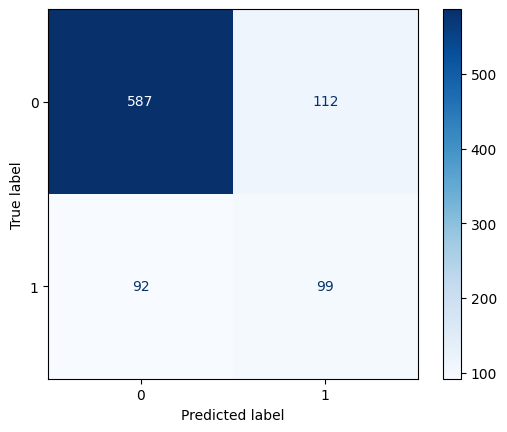

In [85]:
# Check setelah cross-val
y_pred_test_nb = def_nb.predict(X_test_final)

# print report
print('Classification Report Naive Bayes - TEST: \n', classification_report(y_test, y_pred_test_nb), '\n')

# visualisasi 
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(def_nb, X_test_final, y_test, cmap='Blues'))

Model Random Forest memiliki tendensi overfit jika dibandingkan train dan test set. Namun ada ketidakseimbangan, dimana mobil dapat memprediksi index 0 dengan baik (85%), namun kurang dapat dapat memprediksi index 1 dengan baik (49%)

### Ada Boost

In [86]:
# define model
def_adaboost.fit(X_train_final, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', AdaBoostClassifier(random_state=66))])

In [87]:
# prediksi
y_adaboost_train_pred = def_adaboost.predict(X_train_final)
y_adaboost_test_pred = def_adaboost.predict(X_test_final)

In [88]:
# melihat akurasi
print('Training Score: ',round(def_adaboost.score(X_train_final, y_train),4))
print('Testing Score: ', round(def_adaboost.score(X_test_final, y_test),4))

Training Score:  0.8476
Testing Score:  0.8236


**Cross Validation**

Classification Report Adaboost Default - TRAIN
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1630
           1       0.76      0.42      0.54       444

    accuracy                           0.85      2074
   macro avg       0.81      0.69      0.72      2074
weighted avg       0.84      0.85      0.83      2074

F1 Score - All - Cross Validation  :  [0.52252252 0.51982379 0.52586207]
F1 Score - Mean - Cross Validation :  0.5227361266780984
F1 Score - Std - Cross Validation  :  0.002469740560851089
F1 Score - Range :  0.5202663861172473 - 0.5252058672389496
Confusion Matrix      : 


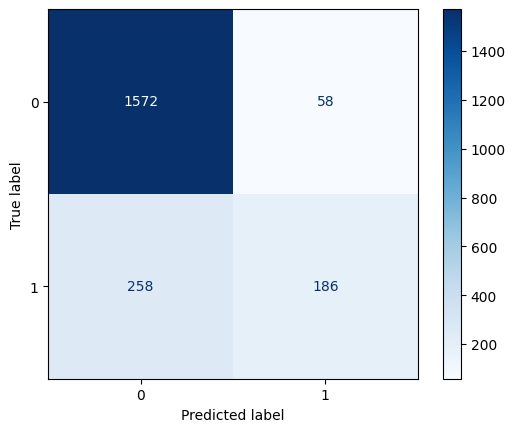

In [89]:
# Classification report tanpa menggunakan hyperparameter
print('Classification Report Adaboost Default - TRAIN')
print(classification_report(y_train, y_adaboost_train_pred))

# Cross Validation dengan `cross_val_score`
from sklearn.model_selection import cross_val_score

f1_cv_adaboost = cross_val_score(def_adaboost, # modellog
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_adaboost)
print('F1 Score - Mean - Cross Validation : ', f1_cv_adaboost.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_adaboost.std())
print('F1 Score - Range : ', (f1_cv_adaboost.mean()-f1_cv_adaboost.std()) , '-', (f1_cv_adaboost.mean()+f1_cv_adaboost.std()))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(def_adaboost, X_train_final, y_train, cmap='Blues'))

Classification Report Random Forest - TEST: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       699
           1       0.65      0.38      0.48       191

    accuracy                           0.82       890
   macro avg       0.75      0.66      0.69       890
weighted avg       0.81      0.82      0.81       890
 

Confusion Matrix      : 


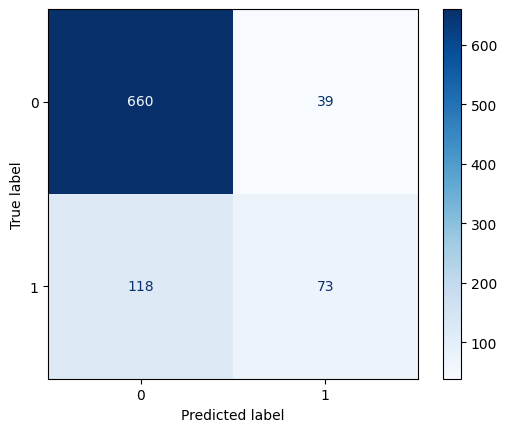

In [90]:
# Check setelah cross-val
y_pred_test_adaboost = def_adaboost.predict(X_test_final)
# print report
print('Classification Report Random Forest - TEST: \n', classification_report(y_test, y_pred_test_adaboost), '\n')
# visualisasi confusion matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(def_adaboost, X_test_final, y_test, cmap='Blues'))

Model Random Forest memiliki tendensi overfit jika dibandingkan train dan test set. Namun ada ketidakseimbangan, dimana mobil dapat memprediksi index 0 dengan baik (89%), namun kurang dapat dapat memprediksi index 1 dengan baik (48%)

# VIII. Model Evaluation

Setelah tiap model dilatih dan dievaluasi, hasil evaluasi kemudian dibandingkan dan dirangkum untuk mendapatkan base model terbaik. Base model terbaik nantinya akan dikembangkan lagi menggunakan hyperparameter terbaik untuk mendapatkan model dengan akurasi tertinggi. 

Akan dilihat hasil rata-rata serta standard deviation untuk mendapatkan metrik yang lebih banyak. 

In [91]:
# menamplkan seluruh evaluasi dengan f1 score train-test, mean, dan sid
print('Evaluation Logistic Regression : ')
print('F1 Score Train : ', f1_score(y_train, y_logreg_train_pred))
print('F1 Score Test :', f1_score(y_test, y_logreg_test_pred))
print('Cross-Val mean :', f1_cv_logreg.mean())
print('Cross-Val std :', f1_cv_logreg.std())
print('')
print('Evaluation SVC : ')
print('F1 Score Train : ', f1_score(y_train, y_svc_train_pred))
print('F1 Score Test :', f1_score(y_test, y_svc_test_pred))
print('Cross-Val mean :', f1_cv_svc.mean())
print('Cross-Val std :', f1_cv_svc.std())
print('')
print('Evaluation Decision Tree : ')
print('F1 Score Train : ', f1_score(y_train, y_dt_train_pred))
print('F1 Score Test :', f1_score(y_test, y_dt_test_pred))
print('Cross-Val mean :', f1_cv_dt.mean())
print('Cross-Val std :', f1_cv_dt.std())
print('')
print('Evaluation Random Forest : ')
print('F1 Score Train : ', f1_score(y_train, y_rf_train_pred))
print('F1 Score Test :', f1_score(y_test, y_rf_test_pred))
print('Cross-Val mean :', f1_cv_rf.mean())
print('Cross-Val std :', f1_cv_rf.std())
print('')
print('Evaluation KNN : ')
print('F1 Score Train : ', f1_score(y_train, y_knn_train_pred))
print('F1 Score Test :', f1_score(y_test, y_knn_test_pred))
print('Cross-Val mean :', f1_cv_knn.mean())
print('Cross-Val std :', f1_cv_knn.std())
print('')
print('Evaluation Naive Bayes : ')
print('F1 Score Train : ', f1_score(y_train, y_nb_train_pred))
print('F1 Score Test :', f1_score(y_test, y_nb_test_pred))
print('Cross-Val mean :', f1_cv_nb.mean())
print('Cross-Val std :', f1_cv_nb.std())
print('')
print('Evaluation AdaBoost : ')
print('F1 Score Train : ', f1_score(y_train, y_adaboost_train_pred))
print('F1 Score Test :', f1_score(y_test, y_adaboost_test_pred))
print('Cross-Val mean :', f1_cv_adaboost.mean())
print('Cross-Val std :', f1_cv_adaboost.std())
print('')

Evaluation Logistic Regression : 
F1 Score Train :  0.3879598662207358
F1 Score Test : 0.3787878787878788
Cross-Val mean : 0.3539315395270097
Cross-Val std : 0.029325284321475187

Evaluation SVC : 
F1 Score Train :  0.44264943457189015
F1 Score Test : 0.4059040590405904
Cross-Val mean : 0.385462467815409
Cross-Val std : 0.011265502435783553

Evaluation Decision Tree : 
F1 Score Train :  1.0
F1 Score Test : 0.4068627450980392
Cross-Val mean : 0.4218396177391434
Cross-Val std : 0.023890690738954584

Evaluation Random Forest : 
F1 Score Train :  1.0
F1 Score Test : 0.5046153846153846
Cross-Val mean : 0.5122546321775822
Cross-Val std : 0.013112406924724445

Evaluation KNN : 
F1 Score Train :  0.4854070660522273
F1 Score Test : 0.3819444444444445
Cross-Val mean : 0.34336370600617117
Cross-Val std : 0.03439802129070535

Evaluation Naive Bayes : 
F1 Score Train :  0.5348837209302326
F1 Score Test : 0.4925373134328359
Cross-Val mean : 0.5247030241637397
Cross-Val std : 0.01959954268119984

Eva

Dari hasil evaluasi tersebut terlihat bahwa model dengan nilai f1 tertinggi sebagai 0.54 adalah AdaBoost. Selain itu, karena Adaboost memiliki nilai standard deviation terendah yang menandakan bahwa model tersebut konstan, maka model terbaik yang akan dipilih adalah **Adaboost**. 

Selanjutnya akan dilakukan pencarian hyperparameter terbaik dari model Adaboost menggunakan RandomSearchCV yang kemudian akan dilanjutkan dengan GridSearchCV.

## Random Search

In [92]:
# membuat parameter
ada_params = {
    'classifier__n_estimators': [50, 1000, 200],  # Number of estimators
    'classifier__learning_rate': [0.01, 0,1, 0.5, 1.0],  # Learning rate
    'classifier__algorithm': ['SAMME', 'SAMME.R']
}

In [93]:
# melakukan random search untuk adaboost
ada_random = RandomizedSearchCV(estimator=def_adaboost, param_distributions=ada_params, 
                                   n_iter=10, scoring='accuracy', cv=5, random_state=66)

# fit model
ada_random.fit(X_train_final, y_train)

# mendapatkan parameter terbaik
best_adaboost = ada_random.best_estimator_
best_params = ada_random.best_params_

# print paramter terbaik
print("Best Hyperparameters for AdaBoost:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print("Best Score:", ada_random.best_score_)    

Best Hyperparameters for AdaBoost:
classifier__n_estimators: 200
classifier__learning_rate: 0.01
classifier__algorithm: SAMME.R
Best Score: 0.84088237005995


Hasil dari random search akan dibuat rentang kemudian diteruskan untuk mencari hyperparameter terbaik menggunakan grid search.

## Grid Search

In [94]:
# memasukan hasil interval random pada variabel
best_ada_params = {'classifier__n_estimators': range(180, 220, 1), 
                    'classifier__learning_rate': [0.1],
                    'classifier__algorithm': ['SAMME', 'SAMME.R']}

# grid search dengan parameter terbaik random
grid_ada = GridSearchCV(best_adaboost, param_grid=best_ada_params, cv=5, n_jobs=-1)

In [95]:
# fit model
grid_ada.fit(X_train_final, y_train)

# mendapatkan parameter terbaik
best_grid_adaboost = ada_random.best_estimator_
best_grid_params = ada_random.best_params_

# print paramter terbaik
print("Best Hyperparameters for AdaBoost:")
for param, value in best_grid_params.items():
    print(f"{param}: {value}")
print("Best Score:", grid_ada.best_score_)    

Best Hyperparameters for AdaBoost:
classifier__n_estimators: 200
classifier__learning_rate: 0.01
classifier__algorithm: SAMME.R
Best Score: 0.838956987369769


In [96]:
# prediksi
y_adaboost_train_pred = grid_ada.predict(X_train_final)
y_adaboost_test_pred = grid_ada.predict(X_test_final)

Proses melakukan pencarian hyperparameter menggunakan random dan dilanjutkan dengan grid adalah proses two-step parameter search. Hal ini kemudian akan mempercepat pencarian karena RandomSearchCV akan melakukan pencarian dengan titik-titik parameter yang acak. Setelah mendapatkan hyperparameter dari random, value tersebut dapat dikembangkan lagi untuk dicari secara lebih spefisik menggunakan GridSearchCV. Namun ternyata, dalam proyek ini, RandomSearchCV ternyata sudah menangkap nilai terbaik yang terlihat dari value yang sama dengan hasil dari GridSearchCV.

## Tuned Comparison

**AdaBoost Default**

In [97]:
# Classification report Adaboost default
print('Classification Report AdaBoost default')
print(classification_report(y_train, def_adaboost.predict(X_train_final)))
print(classification_report(y_test, def_adaboost.predict(X_test_final)))

Classification Report AdaBoost default
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1630
           1       0.76      0.42      0.54       444

    accuracy                           0.85      2074
   macro avg       0.81      0.69      0.72      2074
weighted avg       0.84      0.85      0.83      2074

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       699
           1       0.65      0.38      0.48       191

    accuracy                           0.82       890
   macro avg       0.75      0.66      0.69       890
weighted avg       0.81      0.82      0.81       890



**AdaBoost Best Hyperparameter**

In [98]:
# Classification report Adaboost terbaik
print('Classification Report AdaBoost dengan hyperparameter')
print(classification_report(y_train, y_adaboost_train_pred))
print(classification_report(y_test, y_adaboost_test_pred))

Classification Report AdaBoost dengan hyperparameter
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1630
           1       0.77      0.41      0.53       444

    accuracy                           0.85      2074
   macro avg       0.81      0.69      0.72      2074
weighted avg       0.84      0.85      0.83      2074

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       699
           1       0.64      0.36      0.46       191

    accuracy                           0.82       890
   macro avg       0.74      0.65      0.68       890
weighted avg       0.80      0.82      0.80       890



Hasil pencarian hyperparameter terbaik dengan model hyperparamter default ternyata mendapati nilai yang sama. Sementara itu, untuk metrik pada index 0 dan 1 masih memiliki ketidakseimbangan hasil evaluasi yang dihasilkan oleh ketidakseimbangan data. 

Secara garis besar, walau ditemukan adanya perbedaan pada model default dan model hyperparameter, selisih ini tidak terlalu signifikan--malah hasil dengan parameter terbaik menggambarkan performa yang menurun karena dalam kasus ini kita akan sangat mementingkan nilai recall. Jadi, walaupun hasil pencarian hyperparameter terbaik mungkin memberikan hasil yang lebih baik untuk beberapa metrik, namun model yang akan di evaluasi lebih lanjut adalah model dengan hyperparameter default karena memiliki kelebihan pada metrik `recall` (ingin meminimalisir False Negatives). 

# IX. Evaluation

## Report

Classification Report Adaboost Hyperparameter - TRAIN: 

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1630
           1       0.76      0.42      0.54       444

    accuracy                           0.85      2074
   macro avg       0.81      0.69      0.72      2074
weighted avg       0.84      0.85      0.83      2074
 

Confusion Matrix      : 


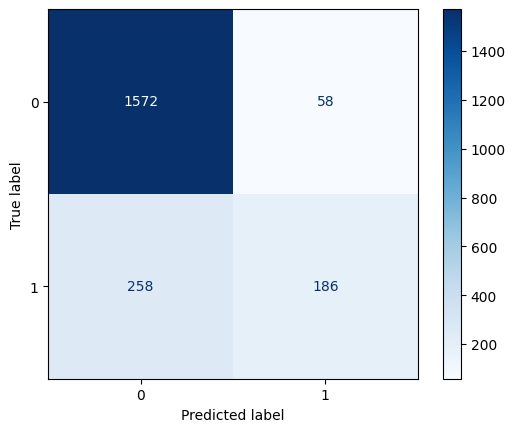

In [99]:
# Check setelah cross-val
y_adaboost_train_pred = def_adaboost.predict(X_train_final)
# print report
print('Classification Report Adaboost Hyperparameter - TRAIN: \n')
print(classification_report(y_train, y_adaboost_train_pred), '\n')
# visualisasi confusion matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(def_adaboost, X_train_final, y_train, cmap='Blues'))


Classification Adaboost Hyperparameter - TEST: 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       699
           1       0.65      0.38      0.48       191

    accuracy                           0.82       890
   macro avg       0.75      0.66      0.69       890
weighted avg       0.81      0.82      0.81       890
 

Confusion Matrix      : 


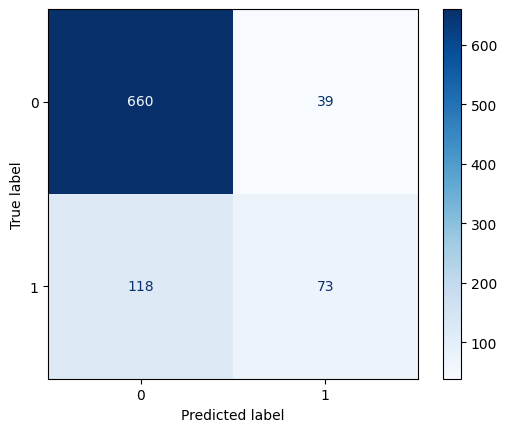

In [100]:
# Check setelah cross-val
y_adaboost_test_pred = def_adaboost.predict(X_test_final)
#print report
print('Classification Adaboost Hyperparameter - TEST: \n')
print(classification_report(y_test, y_adaboost_test_pred), '\n')
# visualisasi confusion matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(def_adaboost, X_test_final, y_test, cmap='Blues'))

Dari hasil evaluasi tersebut, terlihat bahwa data memiliki hasil accuracy training 0.85 dan hasil test 0.82. Hal ini dapat mengindikasikan *overfitting*. 

Dengan mengambil contoh dari evaluasi model AdaBoost terhadap data test, bila mengibaratkan bahwa kita adalah bank penerbit kartu kredit, kita dapat membuat perumpamaan sebagai berikut:
- Dari 699 pemilik kartu yang tidak terkena *default*, 39 diantaranya terprediksi mendapatkan *default payment*. Hal tersebut dapat menimbulkan resiko seperti; kekurangan kepercayaan nasabah, kehilangan *opportunity* serta salah memperkirakan target. 
- Sementara itu, dari 191 penduduk yang mendapatkan *default payment*, hanya 73 yang terprediksi secara benar. Hal ini dapat memberikan resiko yang lebih besar, yakni dapat membiarkan pemilik kartu yang seharusnya dalam kondisi *default* menjadi tidak terdeteksi dan dapat merugikan bank dalam sisi mengganti rugi angsuran serta dapat kehilangan kepercayaan partner bisnis terkait.

In [101]:
# membuat data frame untuk hasil FPR dan TPR
y_pred_proba = def_adaboost.predict_proba(X_test_final)[:, 1]
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba)
auc_ada = roc_auc_score(y_test, y_pred_proba)
print('AUC Score : ', auc_ada)
fpr_tpr = pd.DataFrame({'FPR': fpr_ada, 'TPR': tpr_ada})
fpr_tpr

AUC Score :  0.7463017474477377


,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.005236
2,0.000000,0.015707
3,0.001431,0.015707
4,0.001431,0.089005
...,...,...
270,0.985694,1.000000
271,0.988555,1.000000
272,0.991416,1.000000
273,0.994278,1.000000


In [102]:
print('Sum of FPR:',fpr_tpr['FPR'].sum()) #FPR = FP / (FP + TN)
print('Sum of TPR:',fpr_tpr['TPR'].sum()) #TPR = TP / (TP + FN)

Sum of FPR: 107.9527896995708
Sum of TPR: 179.27748691099475


Diketahui bahwa nilai AUC mendekati 1 yakni 0.74, yang menandakan bahwa performa model cukup baik dalam memprediksi dan mengategorikan sekumpulan fitur menjadi kategori 'No' (index = 0) atau 'Yes' (index = 1)

Pada penjabaran ini diketahui bahwa TPR memiliki jumlah yang lebih tinggi dibandingkan FPR. Hal ini menunjukkan indikasi yang cukup karena hasil prediksi memiliki lebih banyak mendapatkan hasil yang benar atau True Positive. Namun, model tetap memberikan nilai FPR yang juga sangat tinggi yang membuatnya menjadi kurang baik.

Secara garis besar model AdaBoost dengan hyperparameter terbaik sudah memiliki performa yang cukup baik dengan akurasi setinggi 82%. Walau memang memiliki kekurangan dalam mendeteksi golongan 'Yes' atau *default payment* karena adanya ketidakseimbangan data. 

## Result Analysis

In [103]:
# prediksi
y_adaboost_train_pred = def_adaboost.predict(X_train_final)
y_adaboost_test_pred = def_adaboost.predict(X_test_final)

In [104]:
# membuat dataframe hasil prediksi dan aktual
model_result = pd.DataFrame({
    'actual':y_train,
    'pred':y_adaboost_train_pred
})

model_result

,actual,pred
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2069,0,0
2070,0,0
2071,0,0
2072,0,0


In [105]:
# melihat deskripsi model
model_result.describe()

,actual,pred
count,2074.000000,2074.000000
mean,0.214079,0.117647
std,0.410281,0.322267
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [106]:
print('Actual:',model_result['actual'].sum())
print('Pred:',model_result['pred'].sum())

Actual: 444
Pred: 244


Jika dilihat dari perbandingan nilai aktual dan prediksi, diketahui bahwa model masih memiliki kekurangan dimana model memiliki tendensi untuk salah memperkirakan index 1 atau 'Yes' yang terlihat dari jumlah index 1 yang seharusnya berjumlah 444 namun hanya tergambarkan 244 pada data prediksi. Model cenderung untuk menanggap bahwa 'Yes' adalah 'No' atau tidak *default*. Hal ini dapat memberikan kerugian serta resiko yang lebih besar dibandingkan kesalahan prediksi pada klasifikasi lainnya. Kesalahan prediksi dapat menyebabkan kerugian dimana kelompok pemilik kartu yang seharusnya sudah mendapatkan status *default* dapat terus menggunakan kartu kreditnya. Hal ini dapat menimbulkan kerugian penerbit kartu yang harus membayar tunggakan yang tidak dapat dibayarkan oleh pemilik kartu *default*. Selain itu, penerbit kartu kredit juga dapat kehilangan kepercayaan dari partner yang bekerja sama dengan kartu kredit. 

# X. Model Inference

### Model Save and Load

In [107]:
# menyimpan model
with open('def_adaboost.pkl', 'wb') as file_1:
  pickle.dump(def_adaboost, file_1)

In [108]:
# membuka model
with open('def_adaboost.pkl', 'rb') as file_1:
  def_adaboost_inf= pickle.load(file_1)

### Using shuffled data

In [109]:
# membuat data inference dari X train
df_inf = shuffle(X_test_final)

In [110]:
# melihat data yang belum di acak
X_test_final.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_amt_1,pay_2,pay_amt_2,pay_3,pay_amt_3,pay_4,pay_amt_4,pay_5,pay_amt_5,pay_6,pay_amt_6
0,100000.0,2,2,2,29.0,0.0,5000.0,0.0,1000.0,0.0,2180.0,-1.0,1949.0,-1.0,717.0,-1.0,39000.0
1,80000.0,1,2,1,41.0,-2.0,1013.0,-2.0,0.0,-2.0,0.0,-2.0,2115.0,-2.0,4264.0,-1.0,0.0
2,70000.0,2,2,2,25.0,2.0,2070.0,0.0,2000.0,0.0,2000.0,0.0,2000.0,0.0,2000.0,0.0,2100.0
3,30000.0,1,2,1,33.0,0.0,1000.0,0.0,18000.0,0.0,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0
4,360000.0,1,1,2,25.0,-1.0,14076.0,-1.0,5672.0,-1.0,0.0,0.0,0.0,0.0,1646.0,-1.0,3875.0


In [111]:
# memastikan bahwa data telah teracak
df_inf.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_amt_1,pay_2,pay_amt_2,pay_3,pay_amt_3,pay_4,pay_amt_4,pay_5,pay_amt_5,pay_6,pay_amt_6
889,300000.0,2,1,2,30.0,0.0,8000.0,0.0,20219.0,0.0,7500.0,0.0,6500.0,0.0,7500.0,0.0,6000.0
64,200000.0,2,1,2,27.0,-2.0,127.0,-2.0,133.0,-2.0,386.0,-2.0,400.0,-2.0,286.0,-2.0,500.0
150,20000.0,1,2,2,48.0,0.0,2000.0,0.0,2000.0,0.0,0.0,2.0,680.0,0.0,1000.0,0.0,0.0
500,30000.0,1,2,1,38.0,0.0,1500.0,0.0,5937.0,-1.0,5888.0,-1.0,1680.0,-1.0,0.0,-1.0,0.0
310,50000.0,2,3,2,55.0,0.0,1936.0,0.0,3654.0,0.0,1038.0,0.0,1222.0,0.0,1217.0,0.0,946.0


In [112]:
y_inf_pred = def_adaboost_inf.predict(df_inf)

In [113]:
# membuat variabel untuk menghitung
class_counts = Counter(y_inf_pred)

# menghitung persentase
total_samples = len(y_inf_pred)
yes_percentage = class_counts[1] / total_samples * 100
no_percentage = class_counts[0] / total_samples * 100

# print
print('no percentage:', round(no_percentage, 2), '%')
print('yes percentage:', round(yes_percentage, 2), '%')


no percentage: 87.42 %
yes percentage: 12.58 %


### Using manually inserted data

In [114]:
# membuat data dummy
data_inf = {
    'limit_balance': 50000.0,
    'sex': 2,
    'education_level': 10,
    'marital_status': 2,
    'age': 31.0,
    'pay_0': 0.0,
    'pay_amt_1': 2600.0,
    'pay_2': 0.0,
    'pay_amt_2': 3000.0,
    'pay_3': 0.0,
    'pay_amt_3': 3000.0,
    'pay_4': 0.0,
    'pay_amt_4': 2000.0,
    'pay_5': 0.0,
    'pay_amt_5': 2000.0,
    'pay_6': 0.0,
    'pay_amt_6': 2454.0
}
data_inf = pd.DataFrame([data_inf])
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_amt_1,pay_2,pay_amt_2,pay_3,pay_amt_3,pay_4,pay_amt_4,pay_5,pay_amt_5,pay_6,pay_amt_6
0,50000.0,2,10,2,31.0,0.0,2600.0,0.0,3000.0,0.0,3000.0,0.0,2000.0,0.0,2000.0,0.0,2454.0


In [115]:
y_infm_pred = def_adaboost_inf.predict(data_inf)
y_infm_pred

array([1], dtype=int64)

Model sudah dapat berfungsi dengan baik walau dalam prediksinya masih membutuhkan beberapa evaluasi.

# XI. Concept & Conclusion

## Concept

1. Criterion pada Decision Tree:
Dalam Decision Tree, criterion merujuk pada metode yang digunakan untuk mengukur kualitas pemisahan atau impurity dari sebuah node yang akan menjadi dasar dalam pembentukan pohon. Criterion terdapat beberapa criterion umum yang digunakan dalam Decision Tree seperti Gini Index, entropy, information gain. Gini digunakan untuk mengukur kebersihan suatu node, dimana node 0 menggambarkan nilai yang paling pure; entropy menggamarkan seberapa banyak informasi yang diperlukan untuk memprediksi target, dimana entropi rendah menggambarkan data yang cenderung homogen; sedangkan information gain digunakan sebagai penggambaran informasi yang didapatkan dari suatu node. 

2. Pruning pada Tree Model:
Pruning pada Tree-based model adalah proses pengurangan atau pemotongan cabang-cabang yang tidak signifikan dalam pohon untuk mencegah *overfitting*. Pruning dilakukan dengan menghapus cabang-cabang yang tidak memberikan peningkatan yang signifikan terhadap kinerja model pada data validasi atau pengujian. Pruning bertujuan untuk menyederhanakan model dan meningkatkan kemampuan umum dalam memprediksi data baru. Jenis-jenis pruning yang umum digunakan:
- Pre-Pruning: Memotong pohon sebelum sepenuhnya tumbuh dengan memperhatikan kondisi berhenti, seperti batasan *max depth*, jumlah *min sample* di leaf, atau ambang batas impurity.
- Post-Pruning: Membangun pohon secara lengkap, kemudian melakukan pemangkasan dengan menghilangkan cabang-cabang yang memberikan kontribusi kecil terhadap performa model.

3. Memilih K yang optimal pada KNN:
Untuk memilih K yang optimal pada KNN (K-Nearest Neighbors), umumnya dilakukan dengan *cross-validation*. Metode ini melibatkan pembagian data menjadi beberapa *fold*, kemudian dilakukan iterasi dengan menggunakan setiap subset sebagai data test dan data training. Selanjutnya, KNN dijalankan dengan berbagai nilai K yang berbeda. Nilai K yang memberikan performa terbaik pada validasi silang dipilih sebagai K yang optimal. Namun metode ini memiliki kekurangan dapat memakan banyak waktu.

4. Cross Validation:
Cross Validation adalah metode evaluasi model yang melibatkan pemisahan data menjadi subset (fold) untuk training dan test. Dalam proses ini, data dibagi menjadi k subset yang seimbang (misalnya, k = 5), dan kemudian model dilatih dan diuji secara berulang sebanyak 'k' kali. Metode ini dapat menghitung performa model dengan baik dan stabil karena menggunakan beberapa subset data.

5. Metrik-metrik pada Classification Model:
- Accuracy: Mengukur sejauh mana model klasifikasi dapat memprediksi dengan benar secara keseluruhan. Cocok digunakan ketika dataset memiliki distribusi kelas yang seimbang. Akurasi jarang menjadi patokan utama karena hanya mempertimbangkan prediksi yang benar ((TP + TN ) / (TP + FP + FN + TN)).
- Precision: Mengukur sejauh mana prediksi positif yang dilakukan oleh model adalah benar. Precision digunakan ketika kasus di mana kesalahan positif harus diminimalkan ((TP) / (TP + FP)). Dalam proyek ini, precision berarti perbandingan *default payment* dengan jumlah prediksi *default payment*. Hal ini dapat menimbulkan kehilangan opportunity bisnis. 
- Recall: Mengukur sejauh mana model dapat mendeteksi atau mengklasifikasikan kasus positif dengan perbandingan total kasus positif sebenarnya ((TP) / (TP + FN)). Metrik ini digunakan ketika prediksi membutuhkan kesalahan negatif diminimalkan, seperti dalam kasus deteksi penyakit (jika orang sakit terkena salah diagnosa dapat menyebabkan kematian atau menularkan pada orang lain). Dalam kasus ini, recall menjadi metrik yang `paling penting` karena kesalahan prediksi pada *default payment* dapat menimbulkan resiko ganti rugi tunggakan nasabah di luar prediksi. 
- F1-Score
F1-Score adalah metrik rata-rata yang menggabungkan precision dan recall untuk mengevaluasi kinerja suatu model secara keseluruhan. F1-Score menggunakan rata-rata harmonic. F1-Score digunakan ketika kita ingin melihat keseimbangan model, yakni ketika kumpulan data dianggap tidak seimbang ataupun ketika nilai recall dan precision dianggap sama penting.

## Conclusion

Pada proyek ini, kami telah membuat model *machine learning* untuk memprediksi dalam mengklasifikasi pengguna kartu kredit dengan kartu berstatus *default payment*.  Berikut adalah kesimpulan serta analisis dari proyek ini:

**1. Data Exploration:**

General data:

- Terlihat ada hubungan linear dari data numerikal.
- Pemilik kartu dengan *default payment* berjumlah lebih sedikit dengan perbandingan 1 : 4.
- Ada hubungan antara jumlah tagihan dengan *default payment*.
- Tidak terlihat hubungan yang begitu signifikan antara umur dan limit dengan *default payment*.
- Tidak terlihat ada hubungan yang begitu signifikan antara jumlah pembayaran dan limit dengan *default payment*.

Kolom numerikal: 

- 'age' memiliki rentang umur dari 21-69 tahun dengan rata-rata 35 tahun. Informasi ini memberikan gambaran mengenai pengguna kartu kredit. 
- 'limit_balance' memiliki rentang dari \$10,000 - \$800,000 (Dollar NT) dengan rata-rata $163,356. Limit balance juga dapat menggambarkan seberapa tinggi *credit score* seseorang. 
- Pada tiap kolom 'bill_amt_1...6' terlihat ada hal menarik dimana ditemui kenaikan tagihan dari bulan April ('bill_amt_6') hingga September ('bill_amt_1').
- Pada tiap kolom 'pay_amt_1...6' terlihat ada kenaikan yang signifikan pada bulan Agustus ('pay_amt_2') baik dalam rata-rata maupun transaksi maksimal dengan nilai $1,227,082.

Kolom kategorikal:

- sex: Terlihat bahwa perempuan juga memiliki frekuensi *default payment* yang lebih tinggi, namun hal tersebut kurang signifikan karena memang mayoritas data dari kolom 'sex' adalah perempuan.
- education_level: Terlihat bahwa pengguna kartu kredit terbanyak serta merupakan modus dari golongan *default payment* juga merupakan lulusan universitas. Hal ini mungkin akan berhubungan dengan pekerjaan dan daya beli pemilik kartu.
- marital_status: Pemilik kartu kredit yang single merupakan kategori mayoritas yang menggunakan kartu kredit, namun deteksi *default payment* pada kategori menjadi kurang signifikan karena data yang tidak seimbang.
- pay_0...6: Seluruh kolom memiliki kategori mayoritas yakni index '0.0' yang sebelumnya kami artikan sebagai pembayaran minimum. Kami dapat berasumsi bahwa pada bulan ke-2, mungkin pemilik kartu yang menunggak sudah sudah terkena *default payment* sehingga pada bulan seanjutnya mereka sudah tidak bisa menggunakan kartu lagi dan transaksi setelahnya sudah tidak tercatat dalam dataset (jarang ada data mengenai tunggakan yang melebihi tiga bulan).

**2. Feature Engineering**

Ada hal menarik dimana kolom yang sebelumnya terlihat seperti berhubungan dengan target (misalnya 'bill_1...6') justru memiliki korelasi yang sedikit pada bagian feature selection. Begitu juga dengan sebaliknya, fitur yag terlihat tidak berhubungan ternyata masih memiliki hubungan dengan model. Hal ini tentu dikarenakan ada beberapa metrik yang dapat kita gunakan untuk memilih fitur, yang juga harus kita sesuaikan dengan model yang akan kita pilih nantinya (contohnya selektor untuk model linear akan berbeda dengan model tree).

**3. Model Analysis:**
- Model terbaik yang dipilih berdasarkan alur default train > cross validation > random search > grid search, adalah default AdaBoost. Kondisi dimana model default menjadi pertimbangan model yang lebih baik mungkin saja terjadi karena grid akan mencari parameter terbaik berdasarkan hasil evaluasi secara keseluruhan. Sementara itu, model default justu terpilih karena memiliki nilai recall yang labih bagus dibandingkan model AdaBoost dengan hyperparameter terpilih oleh grid. Selain dari poin ini, akan ada beberapa evaluasi dalam teknik serta alur yang akan dijelaskan pada bagian Model Evaluation.
- Jika dilihat berdasarkan perbandingan train dan test, model train memiliki nilai akurasi 85% sementara model test memiliki akurasi 82%. Hal ini dapat mengindikasikan model yang sedikit *overfit*.
- Hasil evaluasi model memberikan nilai yang yang tidak seimbang antara prediksi indeks 0 dan 1. Hal ini diakibarkan karena dataset memiliki ketidakseimbangan antara dua klasifikasi tersebut. Dapat dilakukan manipulasi untuk undersampling/ oversampling data sebagai bahan evaluasi.

**4.  Financial Domain:**

- Context

Ketika *default payment* kartu kredit terjadi, hal ini menunjukkan pelanggaran dari syarat yang telah disepakati oleh pemilik kartu dan penerbit kartu kredit.Hal ini dapat berarti tunggakan pembayaran, belum membayar tagihan tahunan, masa berlaku kartu habis, atau (untuk beberapa lembaga) aktivitas transaksi yang *inactive* selama beberapa bulan. Penerbit kartu kemudian dapat mengambil tindakan seperti mengenakan biaya keterlambatan, menaikkan suku bunga, melaporkan tunggakan ke biro kredit, bahkan mengambil tindakan hukum (sumber: [gocardless](https://gocardless.com/guides/posts/payment-defaults/)). Kartu yang masuk dalam kondisi *default* kemudian tidak dapat digunakan lagi sampai pemilik kartu mengurusnya kepada pihak penerbit, dan pemilik kartu mendapatkan sanksi permanen serta penurunan credit score dan lainnya.

Dalam konteks model prediksi, prediksi *default payment* membutuhkan nilai recall yang tinggi karena keperluan untuk meminimalisir jumlah False Negatives atau type error 2 (ketika pengguna kartu terdeteksi 'No'/ aman namun kenyataannya 'Yes'/ default).

- Model

Sementara itu dengan membandingkan konteks tersebut terhadap model yang telah kami buat, jika dilihat dari perbandingan nilai aktual dan prediksi, diketahui bahwa model masih memiliki kekurangan dimana model memiliki tendensi untuk salah memperkirakan index 1 atau 'Yes' yang terlihat dari jumlah index 1 yang seharusnya berjumlah 444 namun hanya tergambarkan 245 pada data prediksi. 

Model cenderung untuk menanggap bahwa kenyataan kondisi 'Yes' adalah 'No'. Hal ini dapat memberikan kerugian serta resiko yang lebih besar dibandingkan kesalahan prediksi pada klasifikasi lainnya. Kesalahan prediksi dapat menyebabkan kerugian dimana kelompok pemilik kartu yang seharusnya sudah mendapatkan status *default* dapat terus menggunakan kartu kreditnya. Kesalahan tersebut dapat menimbulkan kerugian pihak penerbit kartu yang harus membayar tunggakan yang tidak dapat dibayarkan oleh pemilik kartu *default*. Selain itu, penerbit kartu kredit juga dapat kehilangan kepercayaan dari vendor dan partner bisnis yang bekerja sama dengan kartu kredit. 

Dengan demikian, kami merasa model cukup memiliki kelebihan yang dapat membantu perusahaan penerbit kartu kredit dalam memprediksi kondisi 'No' atau index 0 dengan cukup baik (f1-score skitar 90%). Namun kami tidak merekomendasikan untuk menggunakan model ini sebagai referensi untuk memprediksi kondisi 'Yes' karena dapat memberikan resiko yang besar. 


**5. Further Improvement:**

- Model dapat mencoba menyaring fitur-fitur yang lebih relevan. Dalam proyek ini, karena model yang akan digunakan adalah beberapa model, pemilihan fitur mungkin menjadi kurang fokus sehingga tidak tersaring dengan baik. Untuk selanjutnya, selektor yang akan dipakai juga harusnya lebih sesuai dan berfokus pada model yang ingin dilatih.

- Selanjutnya dalam proses modelling, proses pencarian parameter dan hyperparameter terbaik hanya dilakukan pada model AdaBoost, sementara model lainnya dibiarkan default. Hal ini (hanya melakukan search pada AdaBoost) tidak lain dikarenakan kami *telah melakukan evaluasi pertama menggunakan Cross Validation* yang telah mengerucutkan model menjadi satu. Untuk selanjutnya, bila searching tidak dianggap menjadi hal yang akan memakan waktu, dapat juga dilakukan random/ grid search pada model-model lainnya. Karena bisa jadi model lain memiliki potensi akurasi yang lebih tinggi bila kita juga melakukan *tuning* pada hyperparameternya. 

- Dapat dilakukan pengembangan pada proses pre-processing seperti menggunakan yeo-johnson transformation, menyeimbangkan data dengan *under/oversampling*, serta transformasi dan proses lainnya guna membuat model dapat bekerja dengan lebih optimal. 